# Prelim

In [112]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm

def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    return B_true, W_est, W_est_1

def draw_results_3(n_nodes, er, seed, version_path, data, name):
    if data is None:
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)
    else:
        B_true, W_est, W_est_1 = data[seed-1][0], data[seed-1][1], data[seed-1][2]

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][0], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][1], label='log|W21| after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W22| after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][0], label='log|W12| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][1], label='log|W12| after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][2], label='log|W21| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][3], label='log|W21| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][3], label='log|W22| after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][0], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][2], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][3], label='log|W21| after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed} | original | {name}")
    plt.tight_layout()
    # plt.legend()
    plt.show()

def draw_results_3_all(n_nodes, er, seed, version_path, data, name):
    if data is None:
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)
    else:
        B_true, W_est, W_est_1 = data[seed-1][0], data[seed-1][1], data[seed-1][2]

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[0][0], label='log|W11|  before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][0], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[0][1], label='log|W11|  after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][1], label='log|W21| after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W22| after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[1][0], label='log|W11|  before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][0], label='log|W12| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[1][1], label='log|W11|  after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][1], label='log|W12| after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][2], label='log|W21| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][3], label='log|W21| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][3], label='log|W22| after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[2][0], label='log|W11|  before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][0], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8).flatten(), ax=axs[2][1], label='log|W11|  after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][2], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][3], label='log|W21| after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed} | all | {name}")
    plt.tight_layout()
    # plt.legend()
    plt.show()

def draw_results_3_all_null(n_nodes, er, seed, version_path, data, name):
    if data is None:
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)
    else:
        B_true, W_est, W_est_1 = data[seed-1][0], data[seed-1][1], data[seed-1][2]

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W21| null after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[0][2], label='log|W12| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[0][2], label='log|W22| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[0][3], label='log|W12| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[0][3], label='log|W22| null after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W12| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W12| null after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][2], label='log|W21| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[1][2], label='log|W22| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][3], label='log|W21| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[1][3], label='log|W22| null after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W22| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W22| null after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[2][2], label='log|W12| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][2], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[~B_true].flatten(), ax=axs[2][3], label='log|W12| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][3], label='log|W21| null after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed} | all null | {name}")
    plt.tight_layout()
    # plt.legend()
    plt.show()

def draw_results_3_all_true(n_nodes, er, seed, version_path, data, name):
    if data is None:
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)
    else:
        B_true, W_est, W_est_1 = data[seed-1][0], data[seed-1][1], data[seed-1][2]

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[0][0], label='log|W11| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[0][0], label='log|W21| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[0][1], label='log|W11| true after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[0][1], label='log|W21| true after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[0][2], label='log|W12| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[0][2], label='log|W22| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[0][3], label='log|W12| true after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[0][3], label='log|W22| true after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[1][0], label='log|W11| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[1][0], label='log|W12| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[1][1], label='log|W11| true after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[1][1], label='log|W12| true after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[1][2], label='log|W21| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[1][2], label='log|W22| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[1][3], label='log|W21| true after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[1][3], label='log|W22| true after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[2][0], label='log|W11| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[2][0], label='log|W22| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[2][1], label='log|W11| true after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[2][2], label='log|W12| true before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[2][2], label='log|W21| true before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8)[B_true].flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[B_true].flatten(), ax=axs[2][3], label='log|W21| after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed} | all true | {name}")
    plt.tight_layout()
    # plt.legend()
    plt.show()
    
def get_data(seed, option, data_list):
    assert option in ['est', 'est_dag']
    if option == 'est':
        _opt = 1
    else:
        _opt = 2
    return data_list[seed-1][_opt]

def get_Z(data, n_nodes=20, left=11, right=21):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    return np.abs(data_dict[left]) - np.abs(data_dict[right])

In [12]:
data_20_list = []
for i in range(1, 11):
    B_true, W_est, W_est_1 = load_data(20, i, 'v36/v20')
    data_20_list.append((B_true, W_est, W_est_1))
B_true = data_20_list[0][0]

In [37]:
data_40_list_v34 = []
for i in range(1, 11):
    B_true, W_est, W_est_1 = load_data(40, i, 'v34/v40')
    data_40_list_v34.append((B_true, W_est, W_est_1))
B_true = data_40_list_v34[0][0]

In [38]:
data_60_list_v34 = []
for i in range(1, 11):
    B_true, W_est, W_est_1 = load_data(60, i, 'v34/v60')
    data_60_list_v34.append((B_true, W_est, W_est_1))
B_true = data_60_list_v34[0][0]

In [49]:
data_80_list_v34 = []
for i in tqdm(range(1, 11)):
    B_true, W_est, W_est_1 = load_data(80, i, 'v34/v80')
    data_80_list_v34.append((B_true, W_est, W_est_1))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:42<00:00, 22.24s/it]


In [56]:
data_100_list_v34_no_dag = []
for i in tqdm(range(1, 11)):
    B_true, W_est, W_est_1 = load_data(100, i, 'v34/v100')
    data_100_list_v34_no_dag.append((B_true, W_est, W_est_1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 552.09it/s]


# Test

In [84]:
# thresh = 1e-2
data_list = data_20_list
B_true = data_list[0][0]
n_nodes = 20
for thresh in [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]:
    print(f"====================")
    print(f"t: {thresh}")
    for i in range(1, 11):
        data = get_data(i, 'est', data_list)
        Z_11_21 = get_Z(data, n_nodes=n_nodes)
        Z_11_22 = get_Z(data, n_nodes=n_nodes, left=11, right=22)
        Z_12_22 = get_Z(data, n_nodes=n_nodes, left=12, right=22)
        Z_11_12 = get_Z(data, n_nodes=n_nodes, left=11, right=12)
        Z_21_22 = get_Z(data, n_nodes=n_nodes, left=21, right=22)
        Z_12_21 = get_Z(data, n_nodes=n_nodes, left=12, right=21)
        Z1 = Z_11_21 - Z_12_22
        Z2 = Z_11_21 - Z_11_12
        Z3 = Z_11_21 - Z_21_22
        Z4 = Z1 + Z_11_22
        print(f"seed {i}: ")
        print(f"Z = Z_11_21 - Z_12_22: ", end="")
        print((Z1[~B_true] > thresh).sum() - (Z1[~B_true] < -thresh).sum(), end=" | ")
        print((Z1[B_true] > thresh).sum() - (Z1[B_true] < -thresh).sum())
        
        print(f"Z = Z_11_21 - Z_11_12: ", end="")
        print((Z2[~B_true] > thresh).sum() - (Z2[~B_true] < -thresh).sum(), end=" | ")
        print((Z2[B_true] > thresh).sum() - (Z2[B_true] < -thresh).sum())

        print(f"Z = Z_11_21 - Z_21_22: ", end="")
        print((Z3[~B_true] > thresh).sum() - (Z3[~B_true] < -thresh).sum(), end=" | ")
        print((Z3[B_true] > thresh).sum() - (Z3[B_true] < -thresh).sum())

        print(f"Z = Z_11_21 - Z_12_21 + Z_12_21: ", end="")
        print((Z4[~B_true] > thresh).sum() - (Z4[~B_true] < -thresh).sum(), end=" | ")
        print((Z4[B_true] > thresh).sum() - (Z4[B_true] < -thresh).sum())

t: 1
seed 1: 
Z = Z_11_21 - Z_12_22: 2 | 0
Z = Z_11_21 - Z_11_12: 0 | 34
Z = Z_11_21 - Z_21_22: 2 | 33
Z = Z_11_21 - Z_12_21 + Z_12_21: 3 | 29
seed 2: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 35
Z = Z_11_21 - Z_21_22: 0 | 33
Z = Z_11_21 - Z_12_21 + Z_12_21: 5 | 31
seed 3: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 32
Z = Z_11_21 - Z_21_22: 0 | 33
Z = Z_11_21 - Z_12_21 + Z_12_21: 4 | 33
seed 4: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 34
Z = Z_11_21 - Z_21_22: 0 | 30
Z = Z_11_21 - Z_12_21 + Z_12_21: 4 | 28
seed 5: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 34
Z = Z_11_21 - Z_21_22: 0 | 31
Z = Z_11_21 - Z_12_21 + Z_12_21: 5 | 30
seed 6: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 37
Z = Z_11_21 - Z_21_22: 0 | 29
Z = Z_11_21 - Z_12_21 + Z_12_21: 5 | 24
seed 7: 
Z = Z_11_21 - Z_12_22: 0 | 0
Z = Z_11_21 - Z_11_12: 0 | 37
Z = Z_11_21 - Z_21_22: 0 | 33
Z = Z_11_21 - Z_12_21 + Z_12_21: 5 | 32
seed 8: 
Z = Z_11_21 - Z_12_2

## knockoffDiagn with adjust_marg

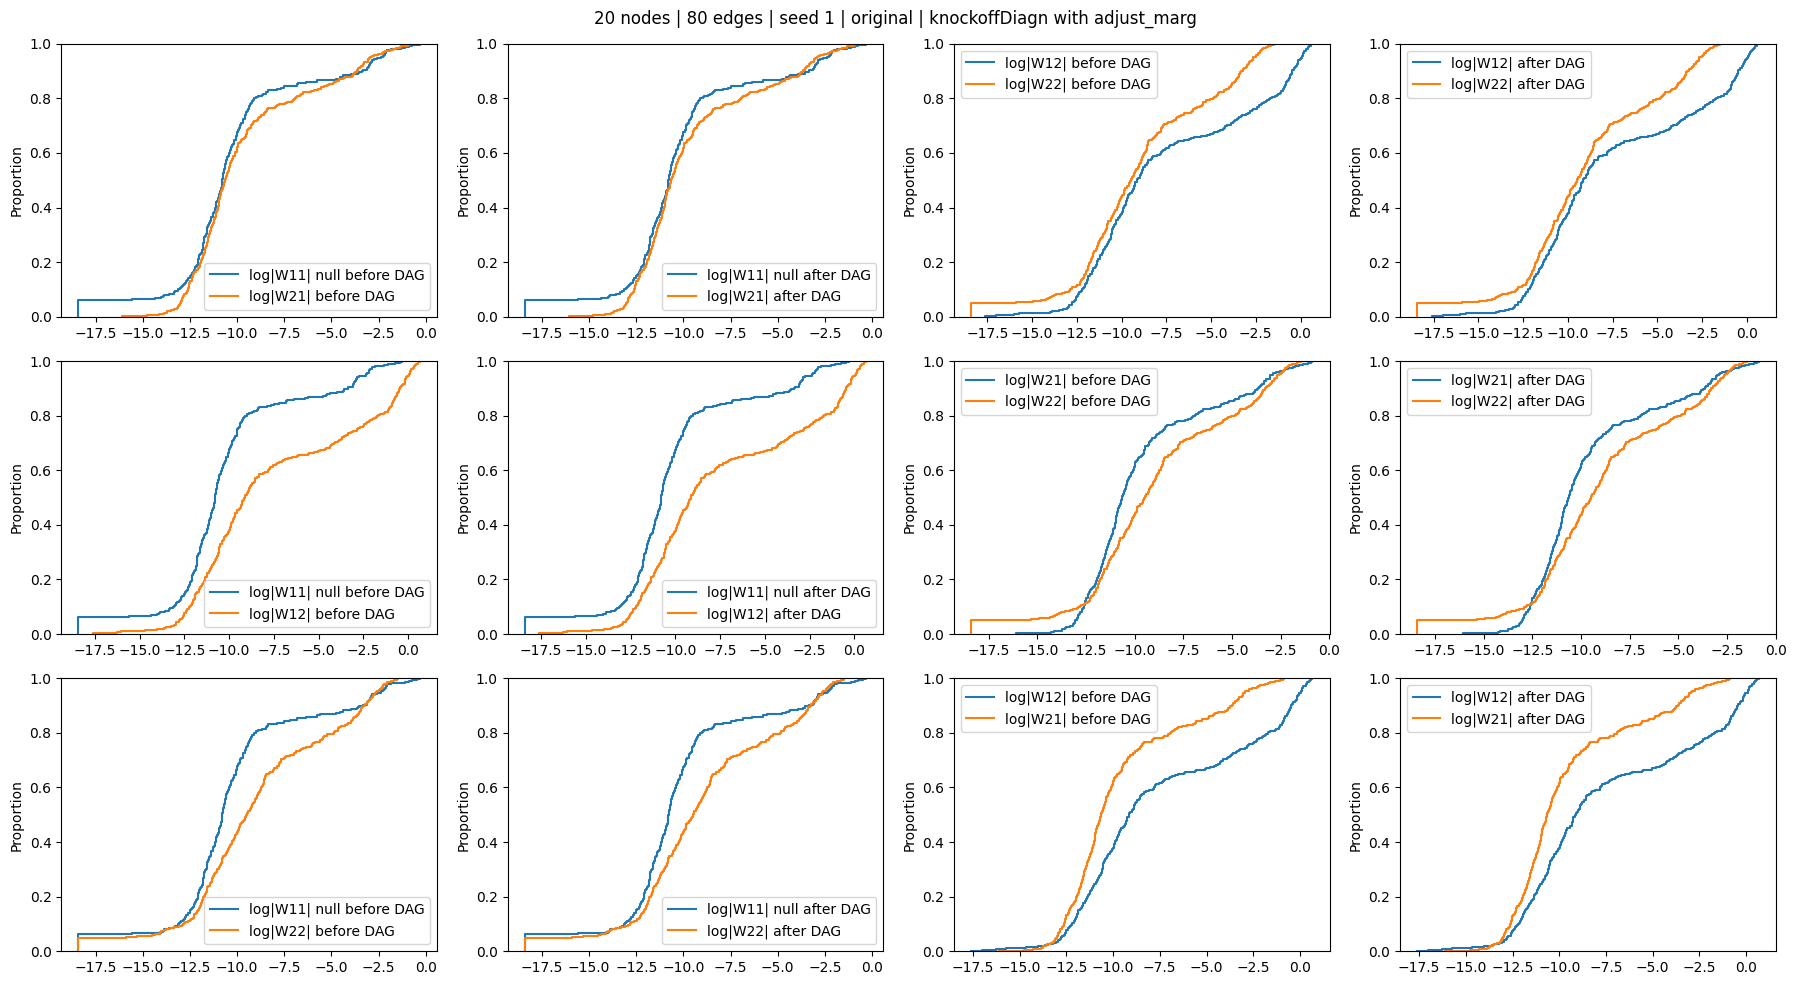

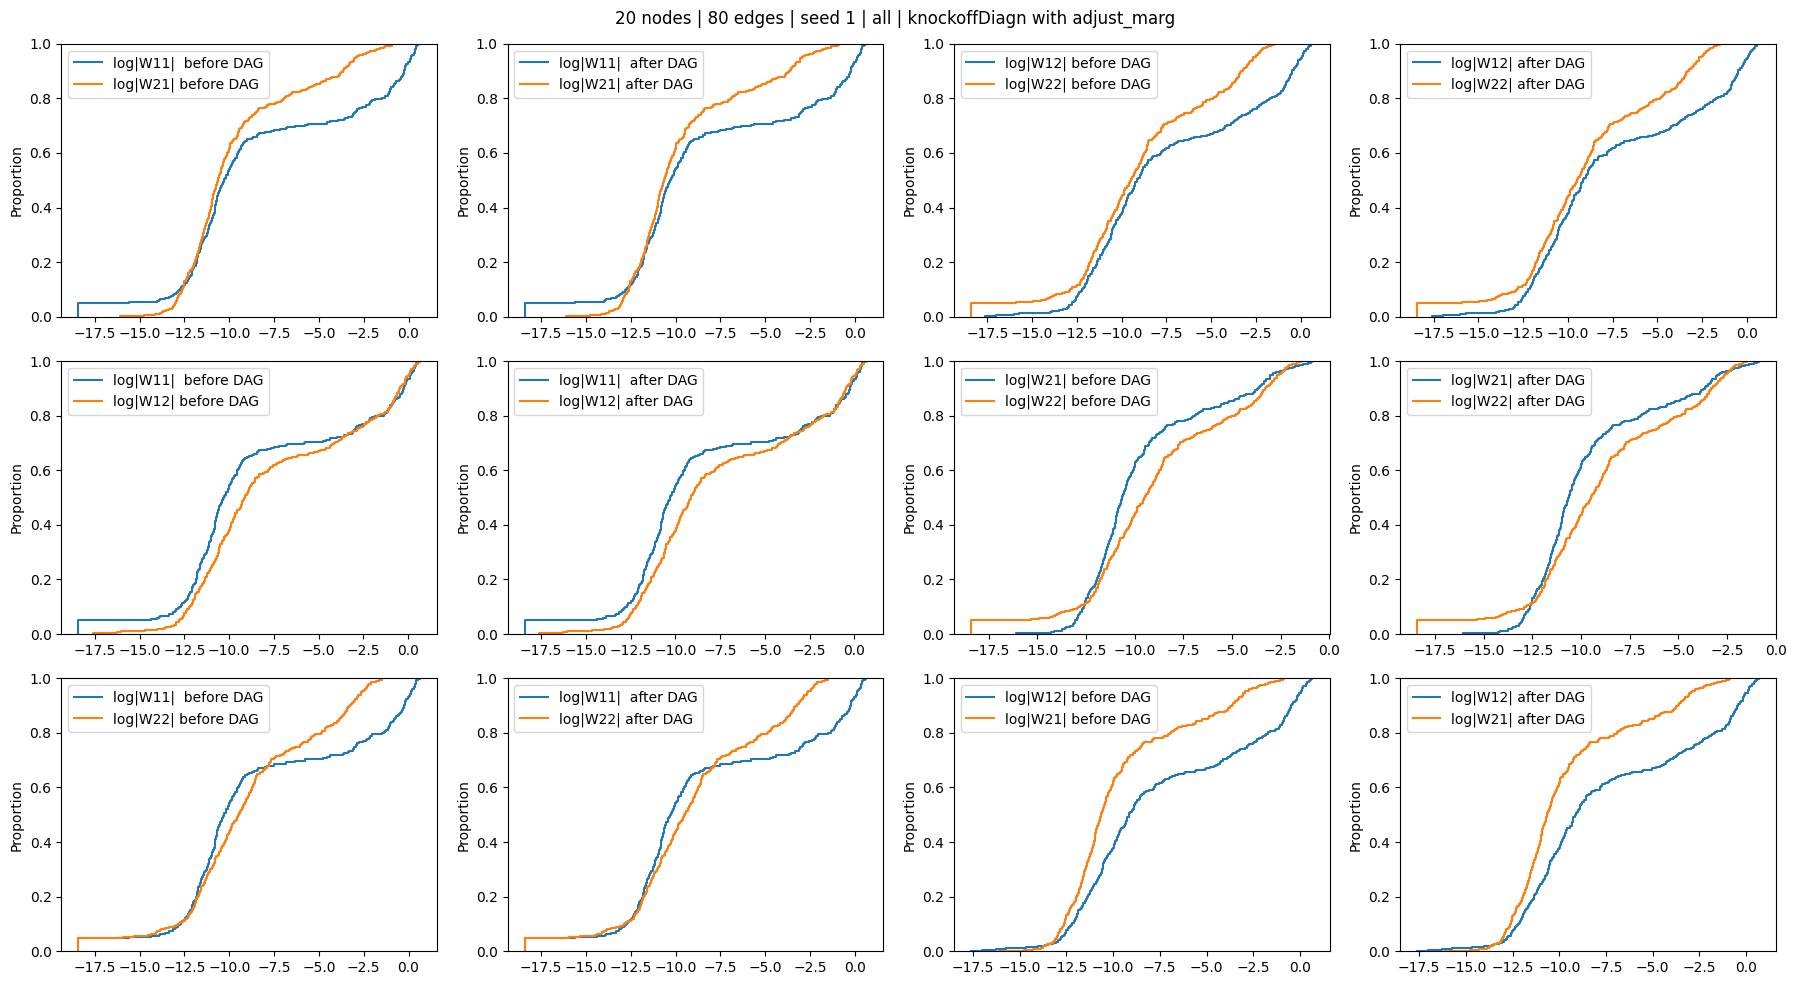

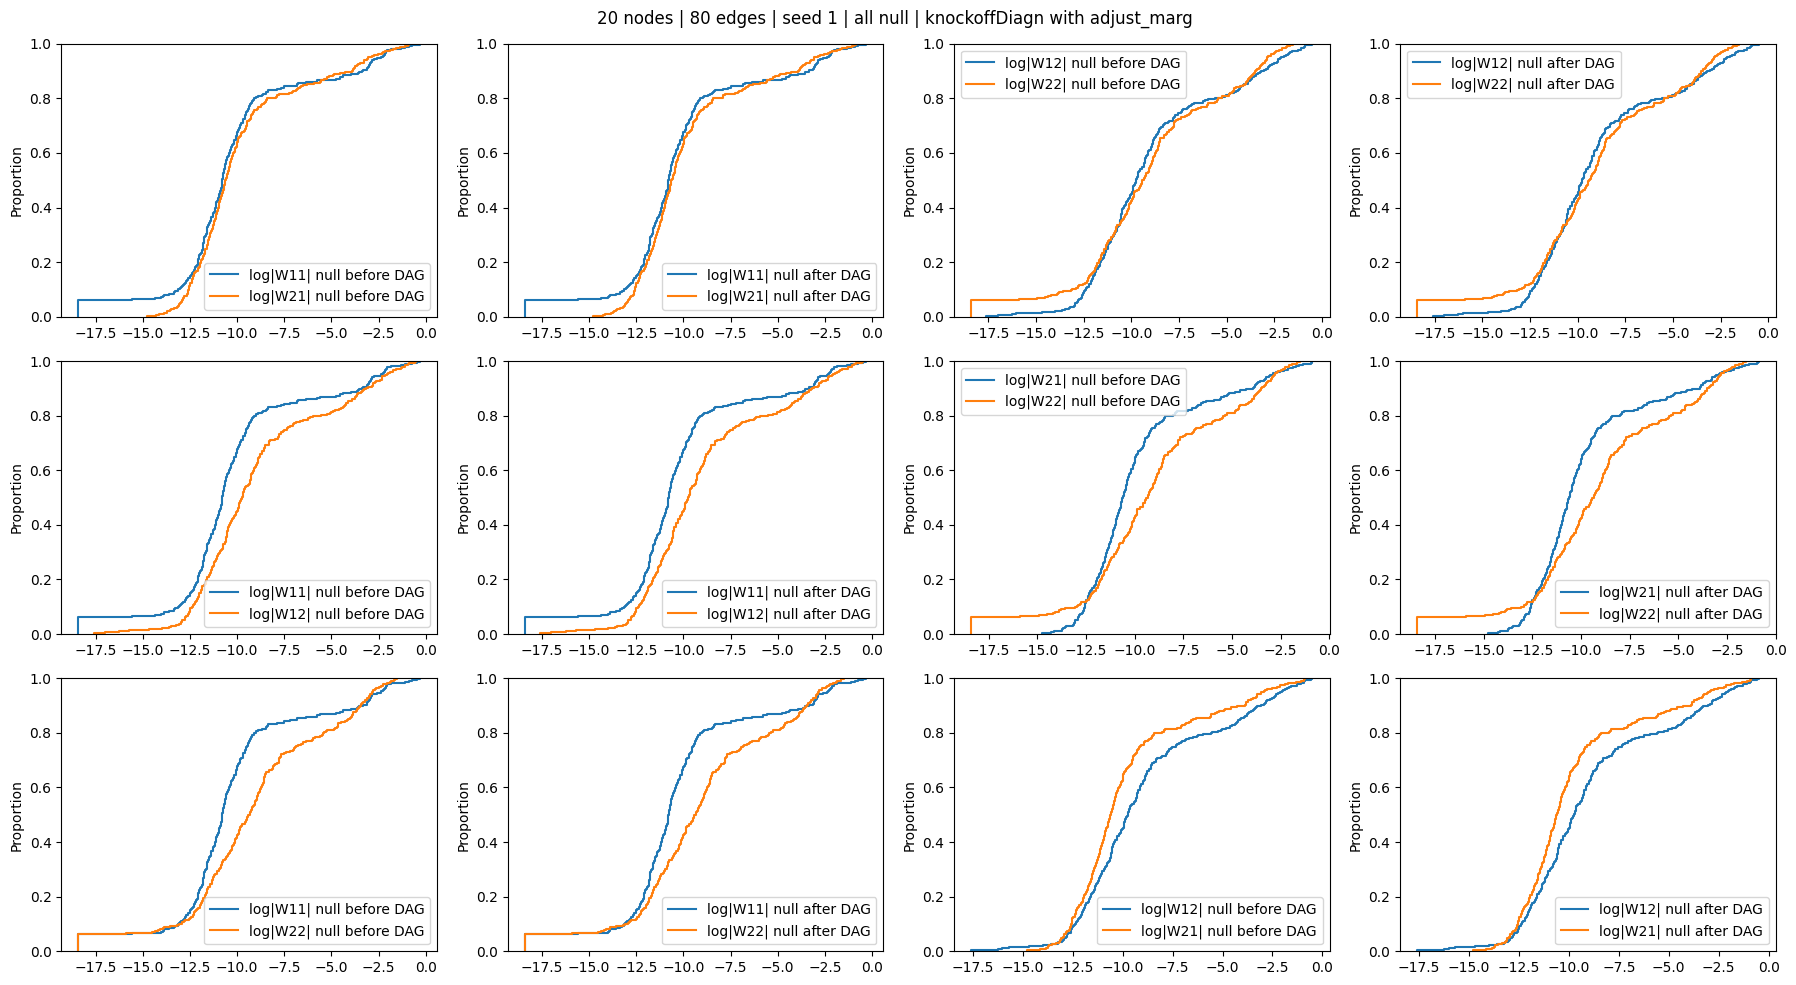

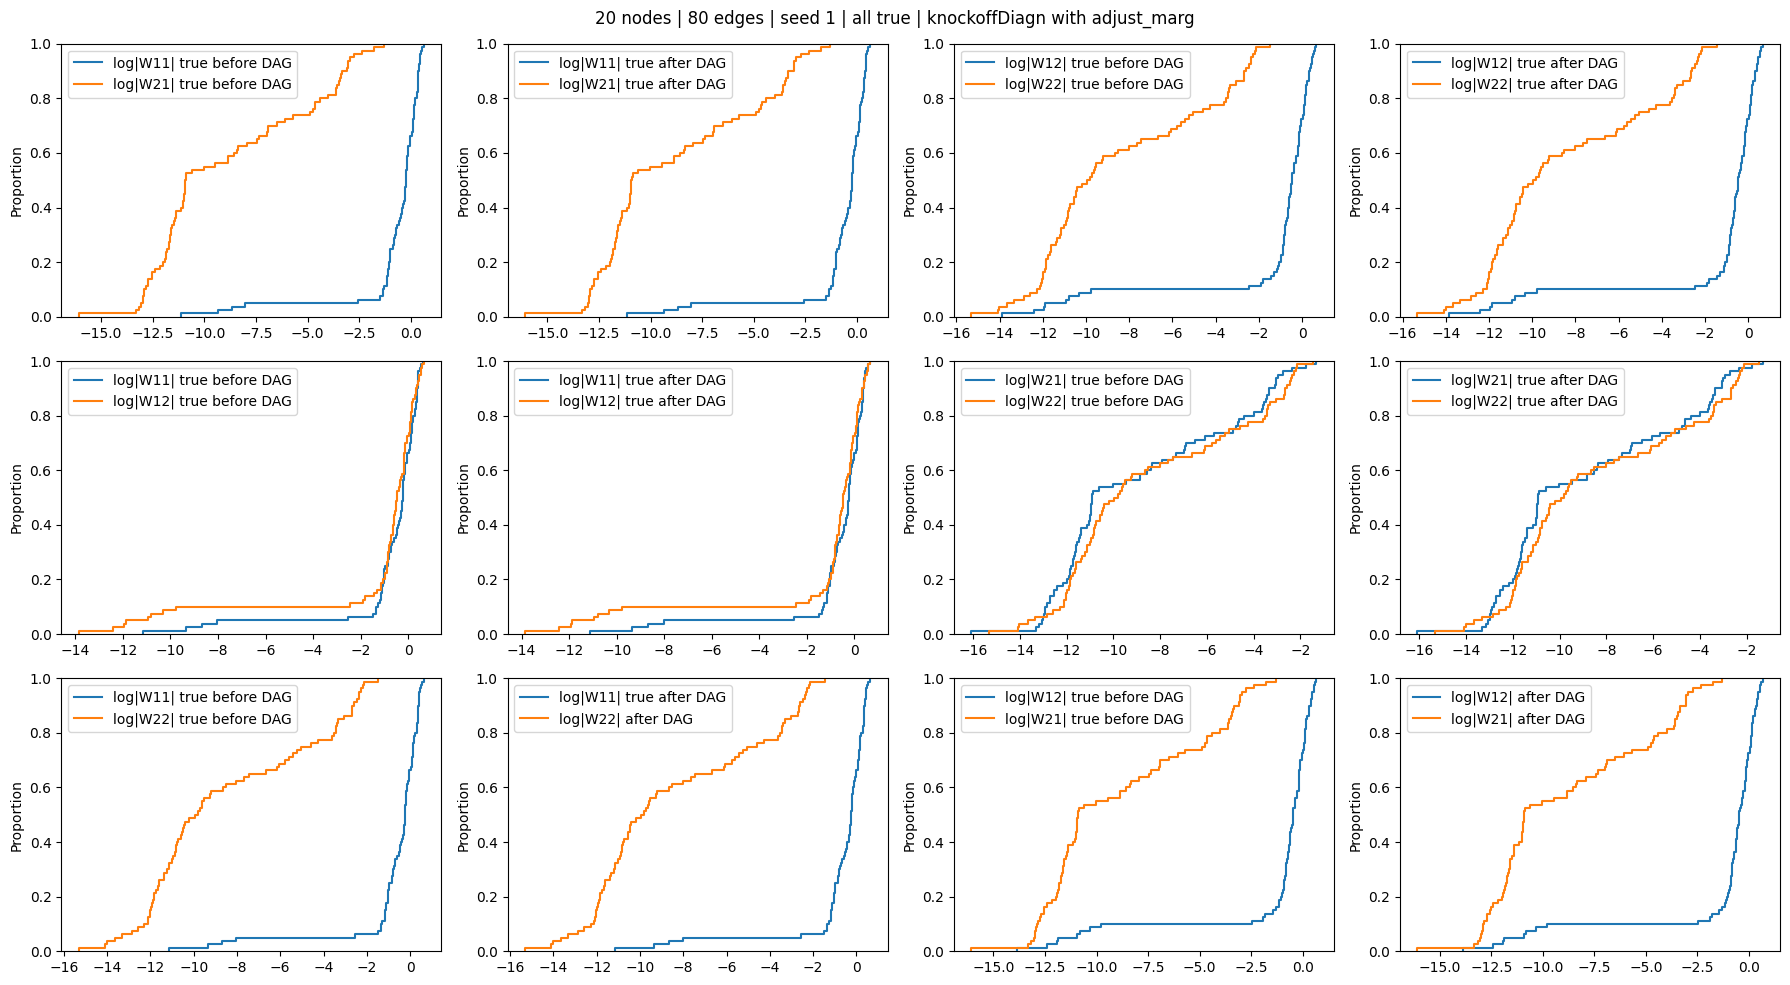

In [109]:
draw_results_3(20, 4, 1, 'v34/v20', None, 'knockoffDiagn with adjust_marg')
draw_results_3_all(20, 4, 1, 'v34/v20', None, 'knockoffDiagn with adjust_marg')
draw_results_3_all_null(20, 4, 1, 'v34/v20', None, 'knockoffDiagn with adjust_marg')
draw_results_3_all_true(20, 4, 1, 'v34/v20', None, 'knockoffDiagn with adjust_marg')

## knockoffDiagn w/o adjust_marg

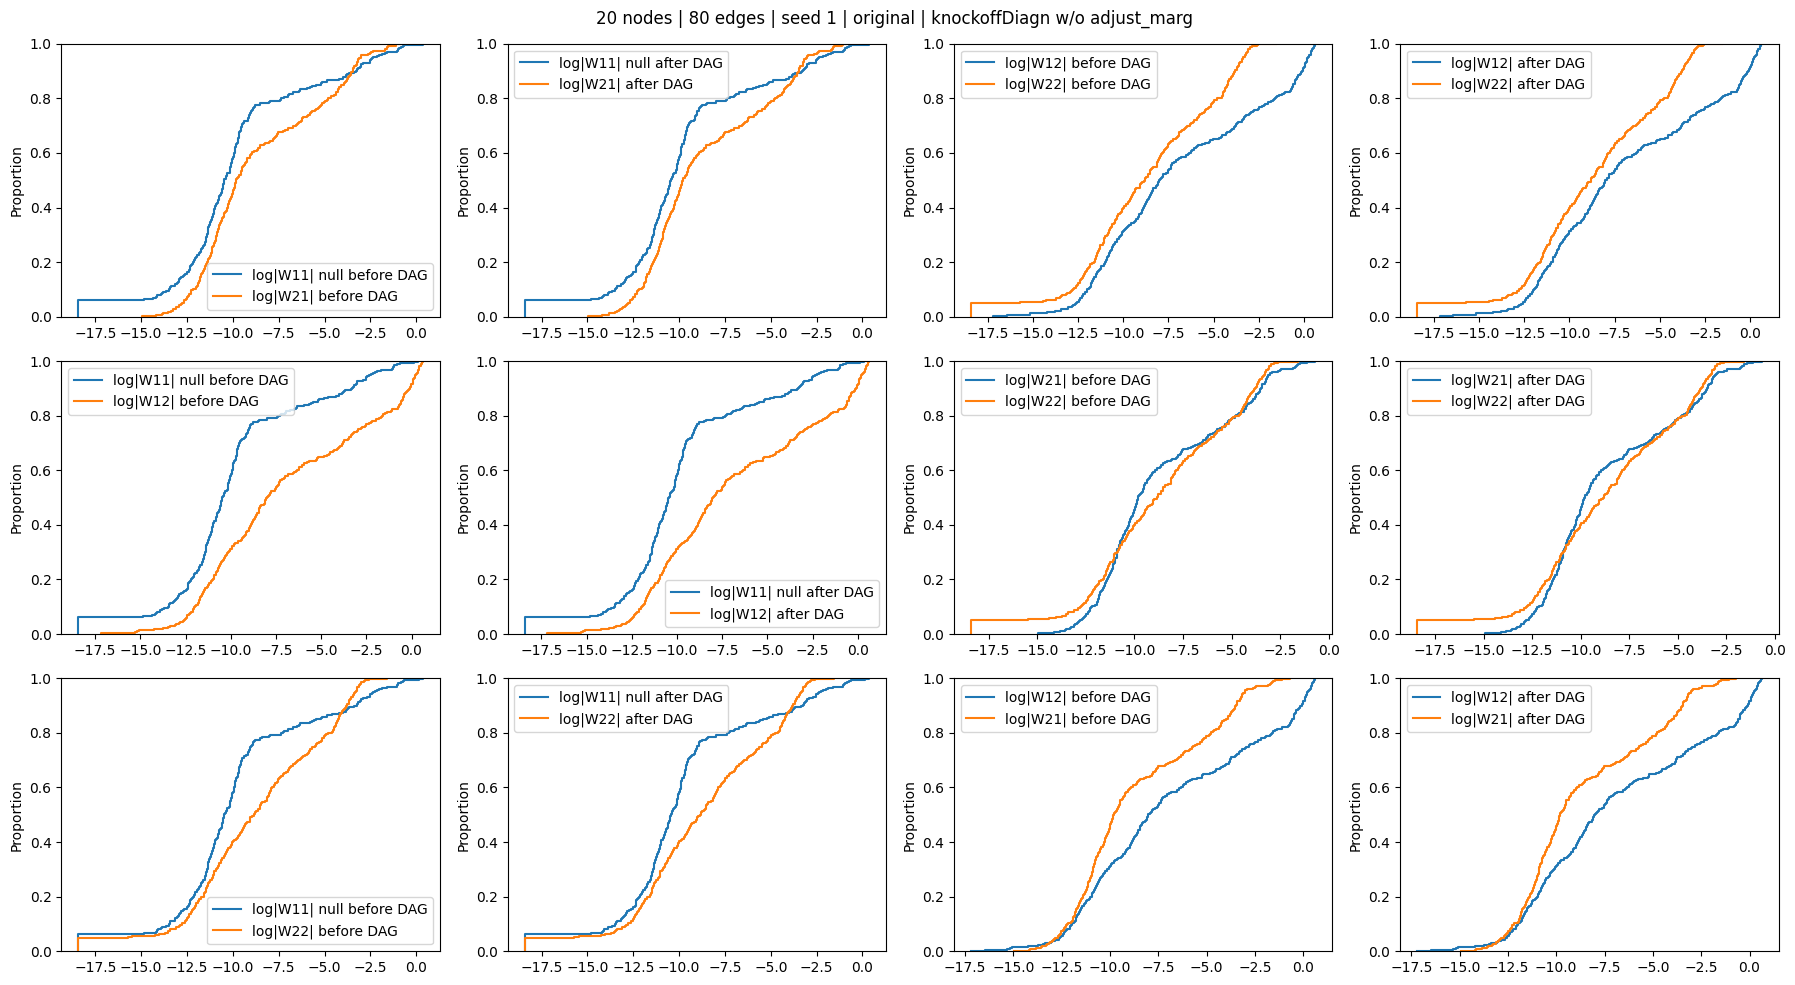

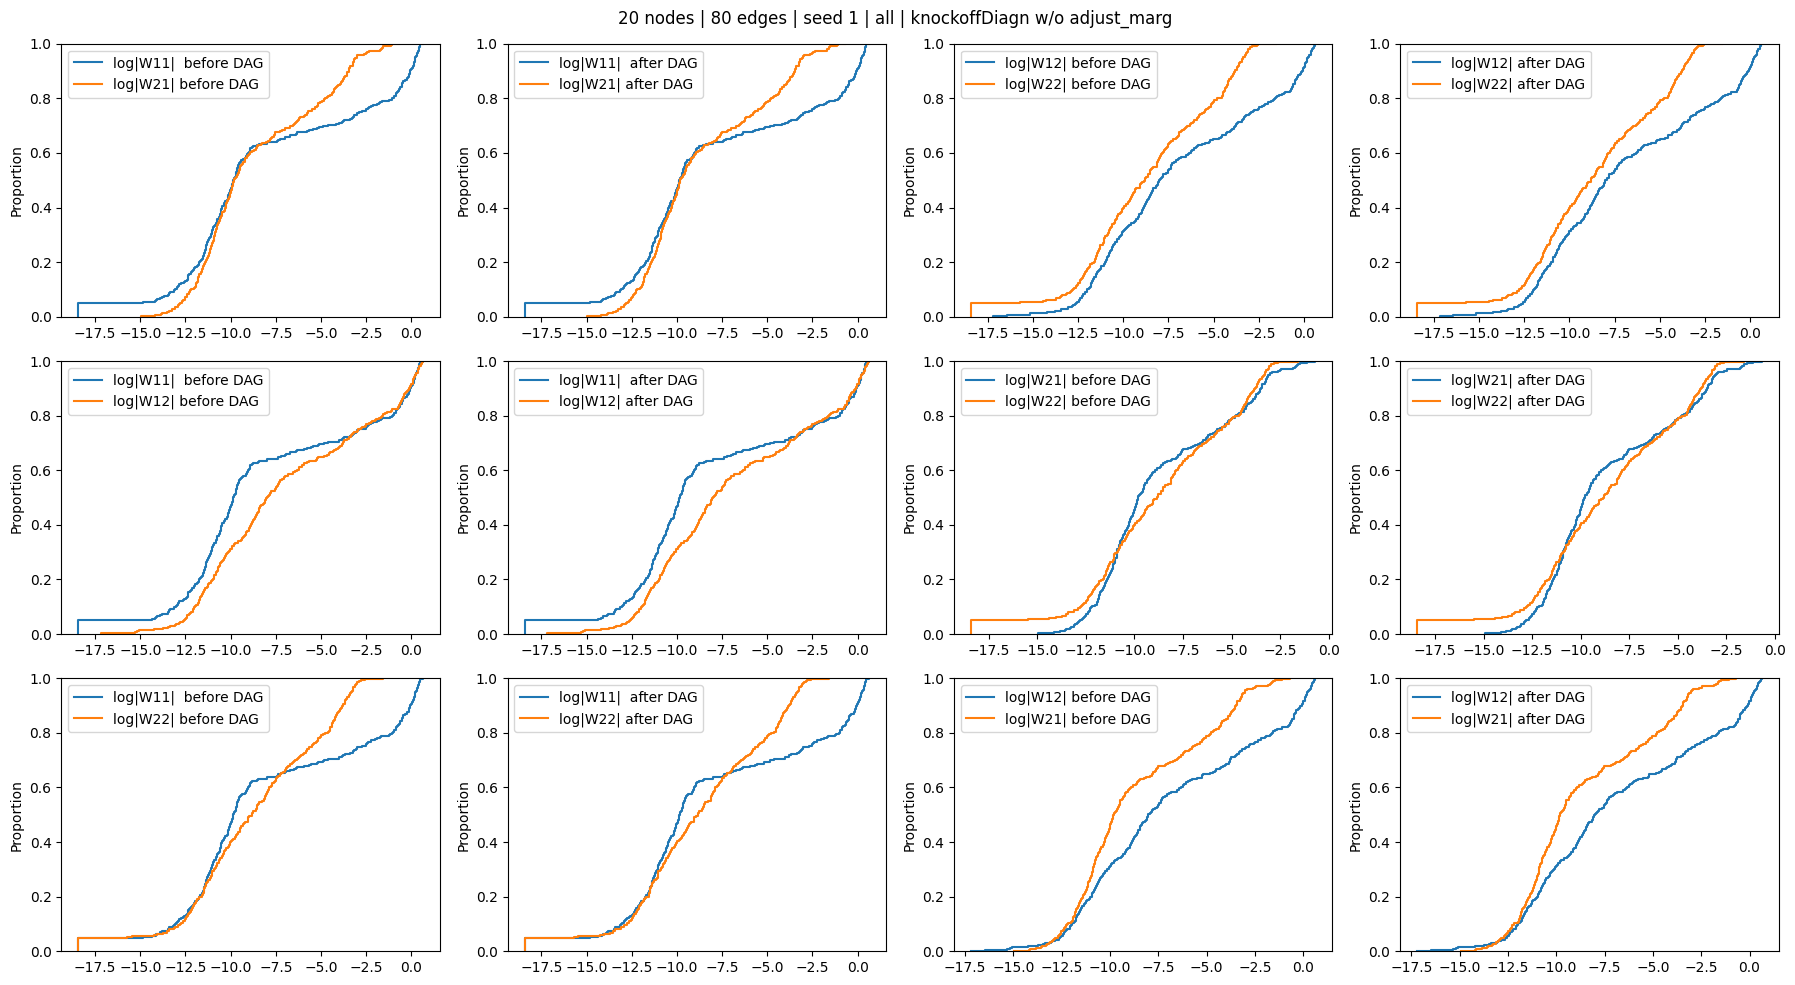

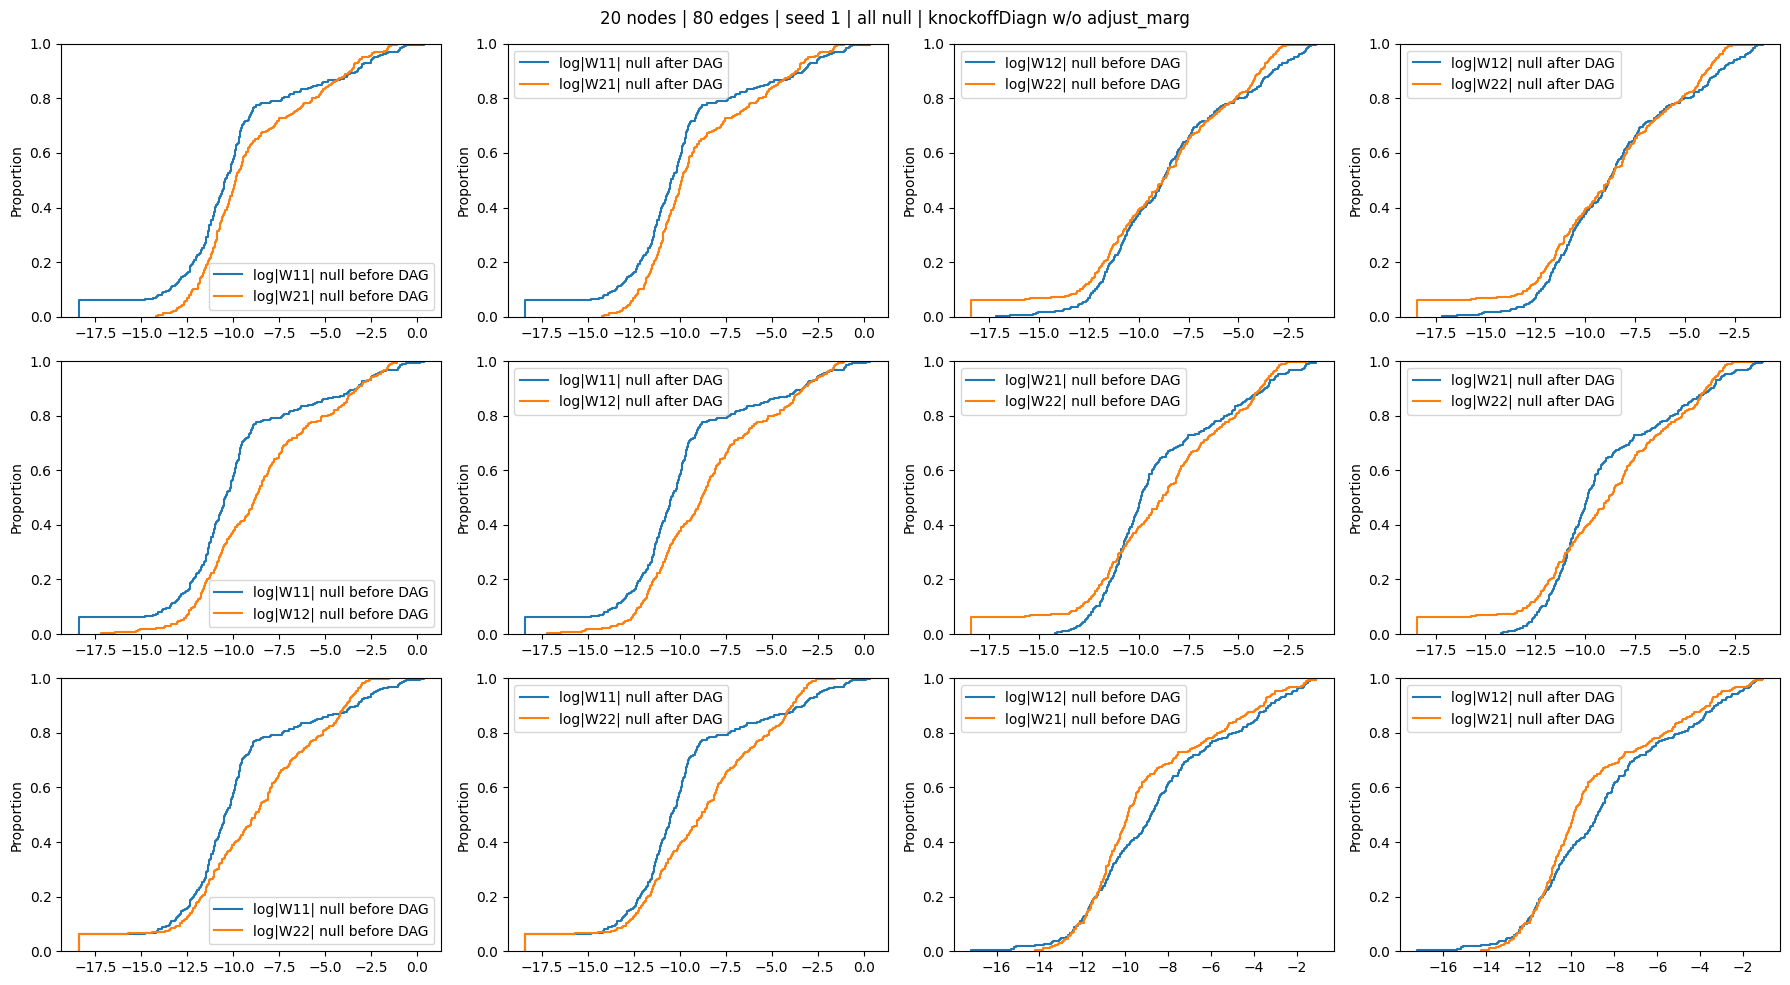

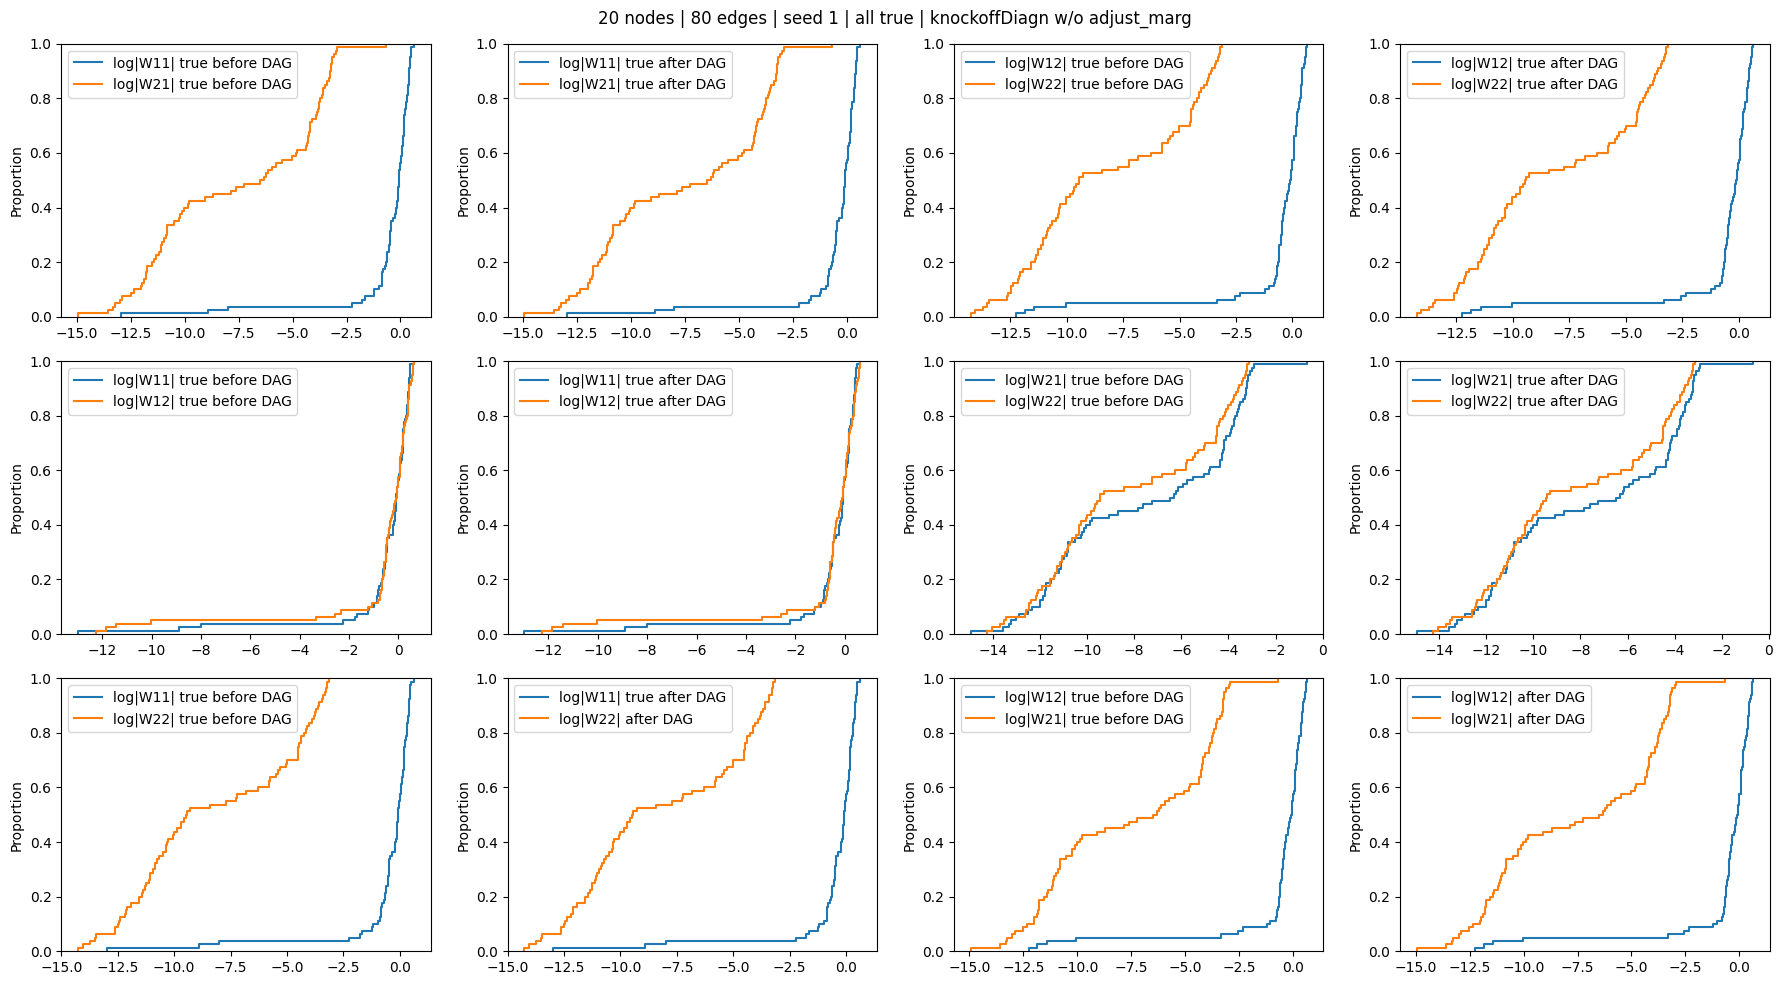

In [110]:
draw_results_3(20, 4, 1, 'v36/v20', None, 'knockoffDiagn w/o adjust_marg')
draw_results_3_all(20, 4, 1, 'v36/v20', None, 'knockoffDiagn w/o adjust_marg')
draw_results_3_all_null(20, 4, 1, 'v36/v20', None, 'knockoffDiagn w/o adjust_marg')
draw_results_3_all_true(20, 4, 1, 'v36/v20', None, 'knockoffDiagn w/o adjust_marg')

## knockoffGAN

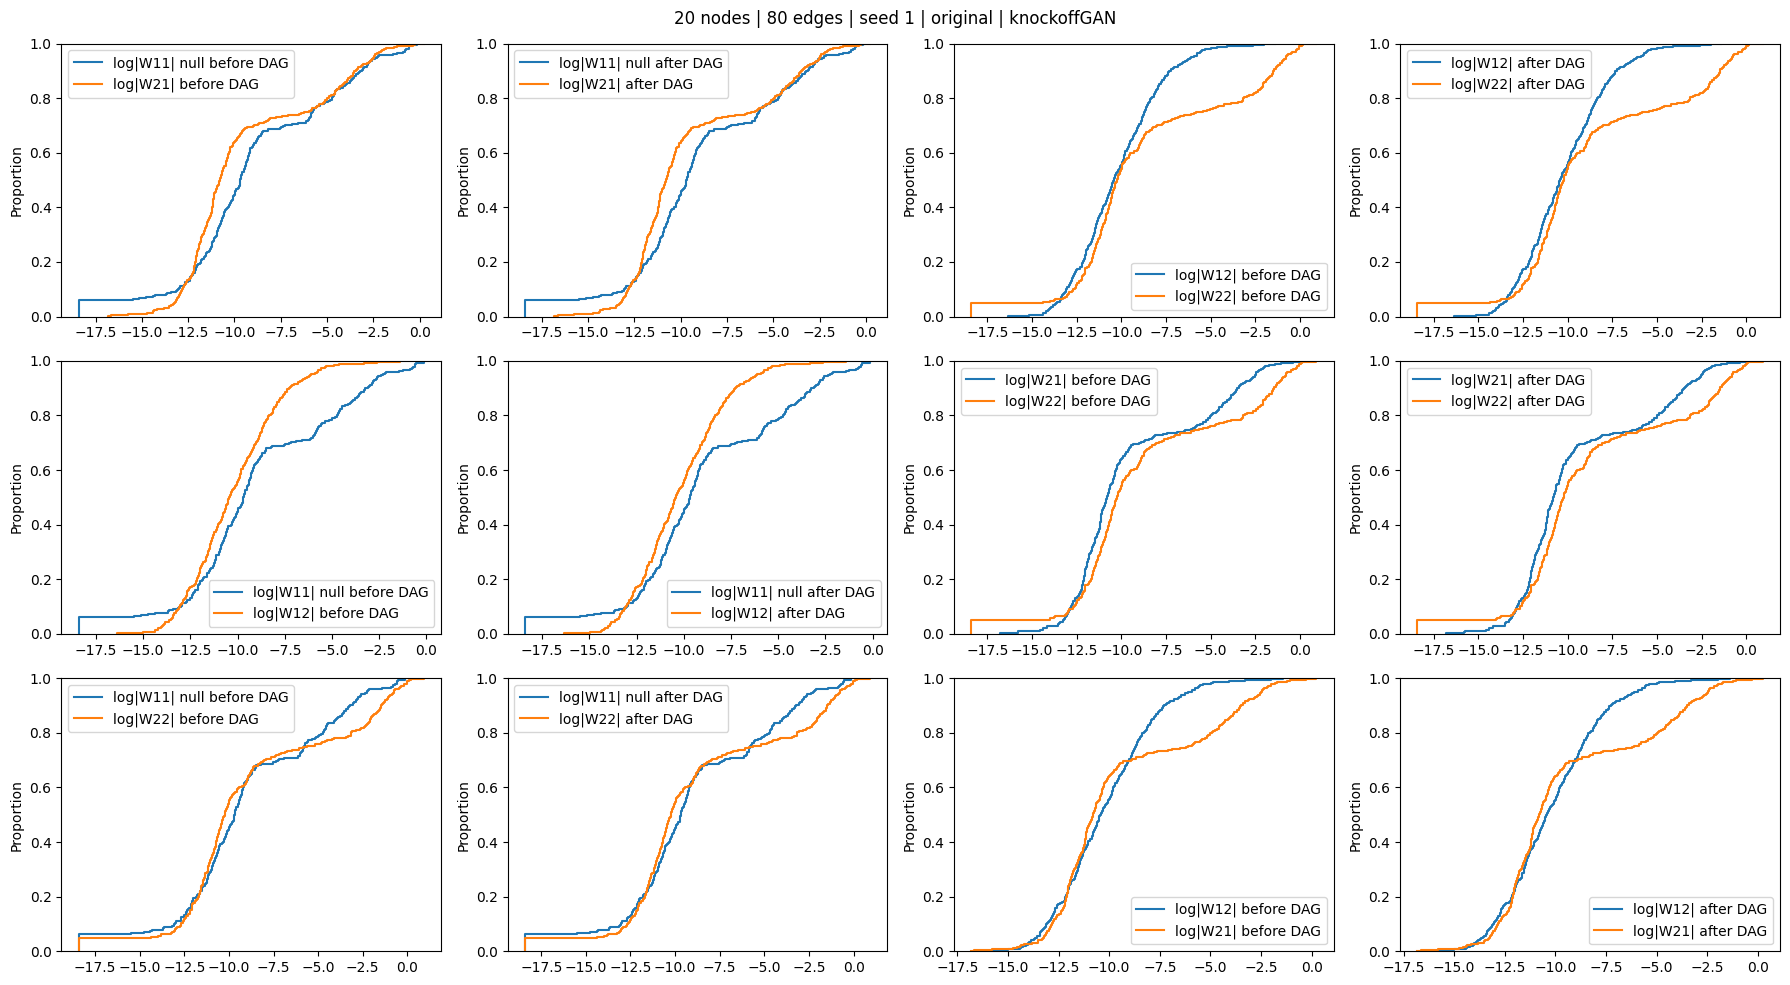

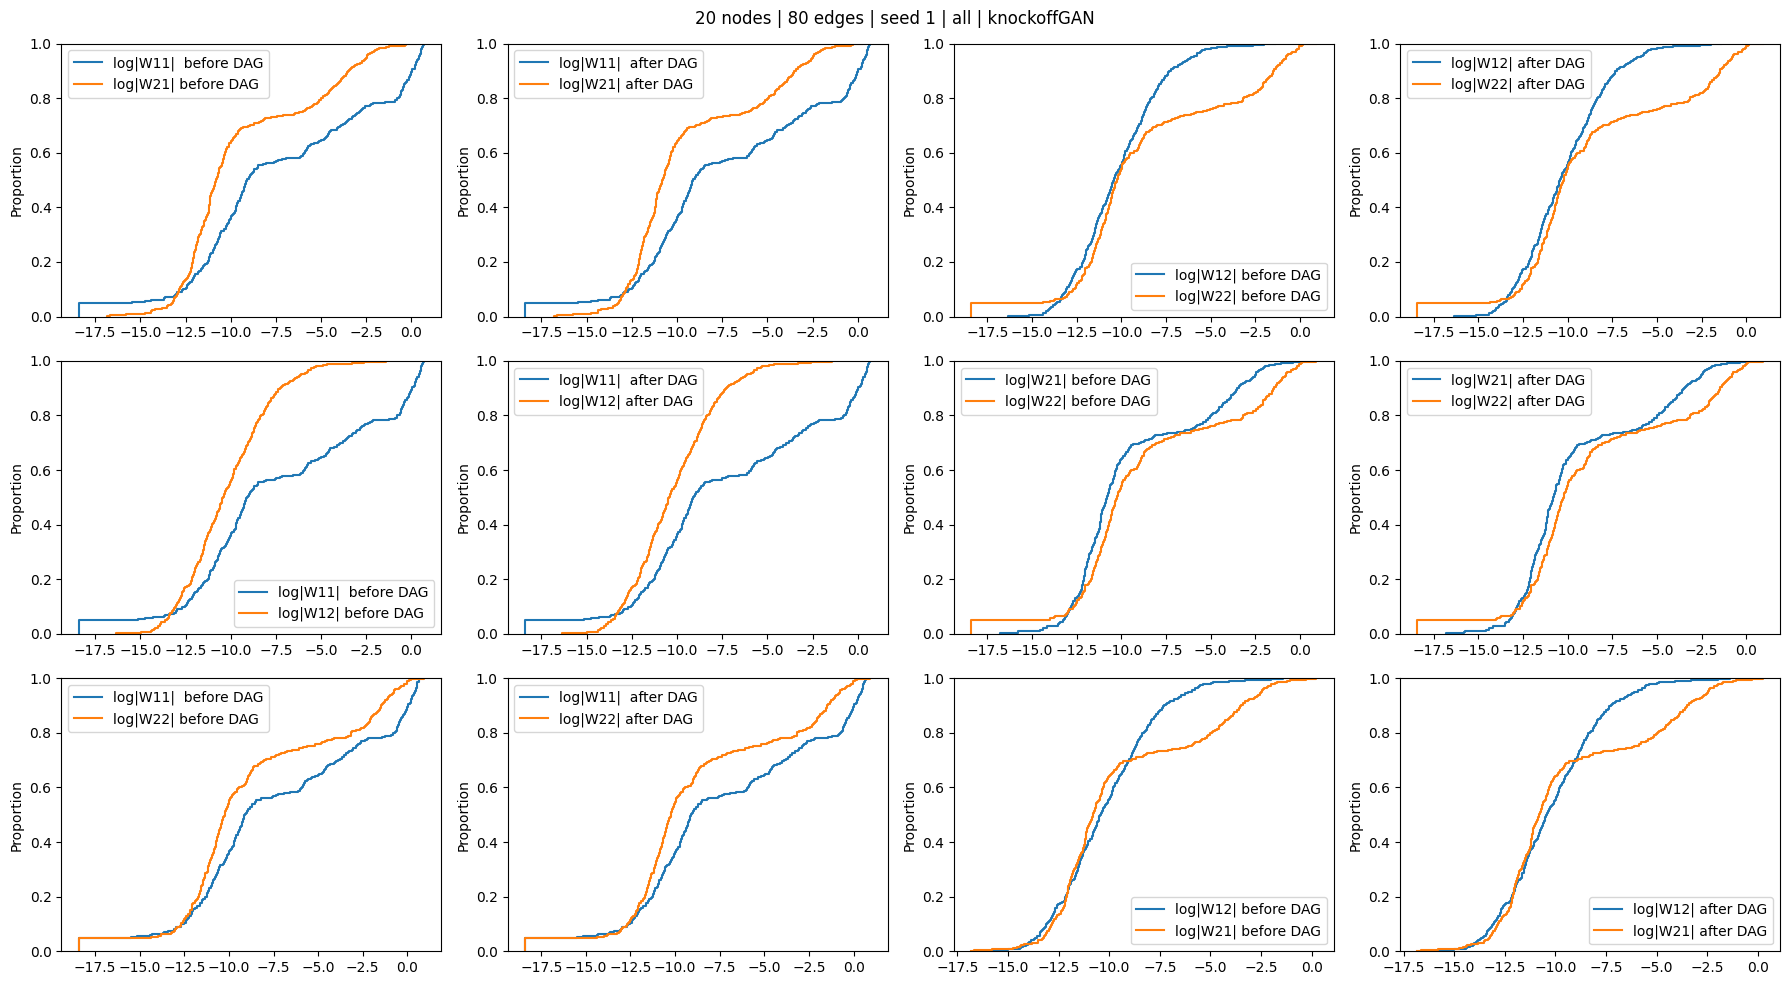

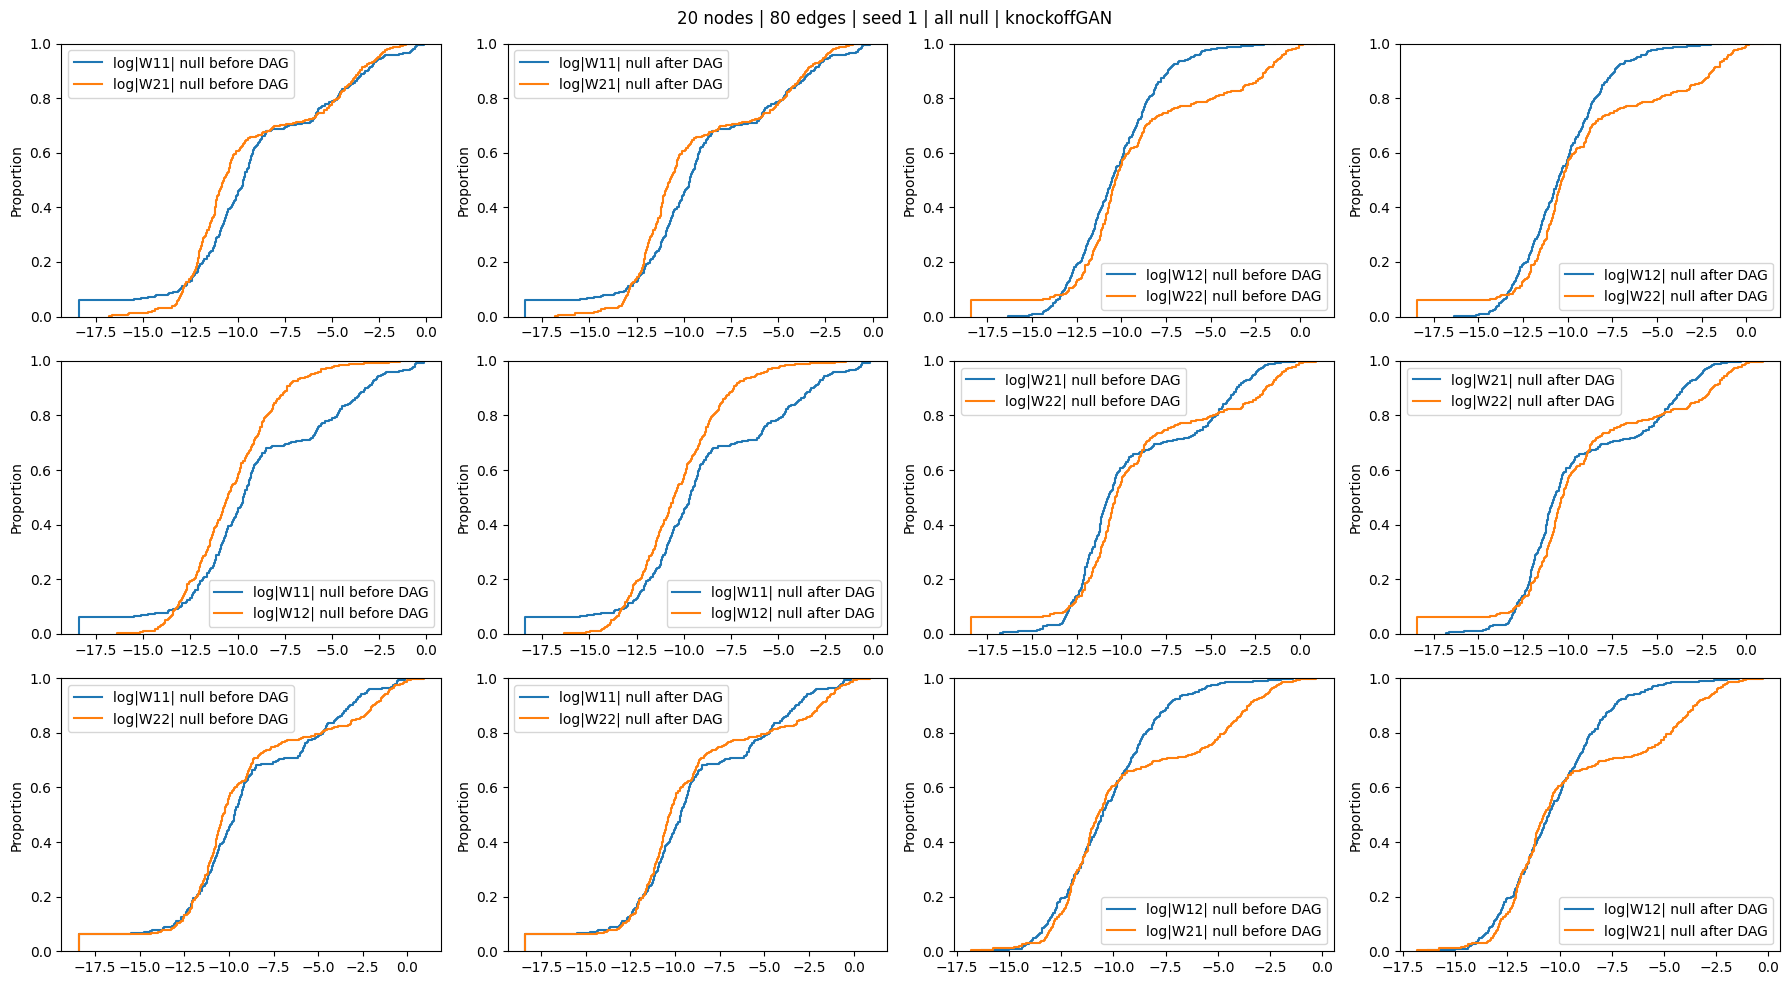

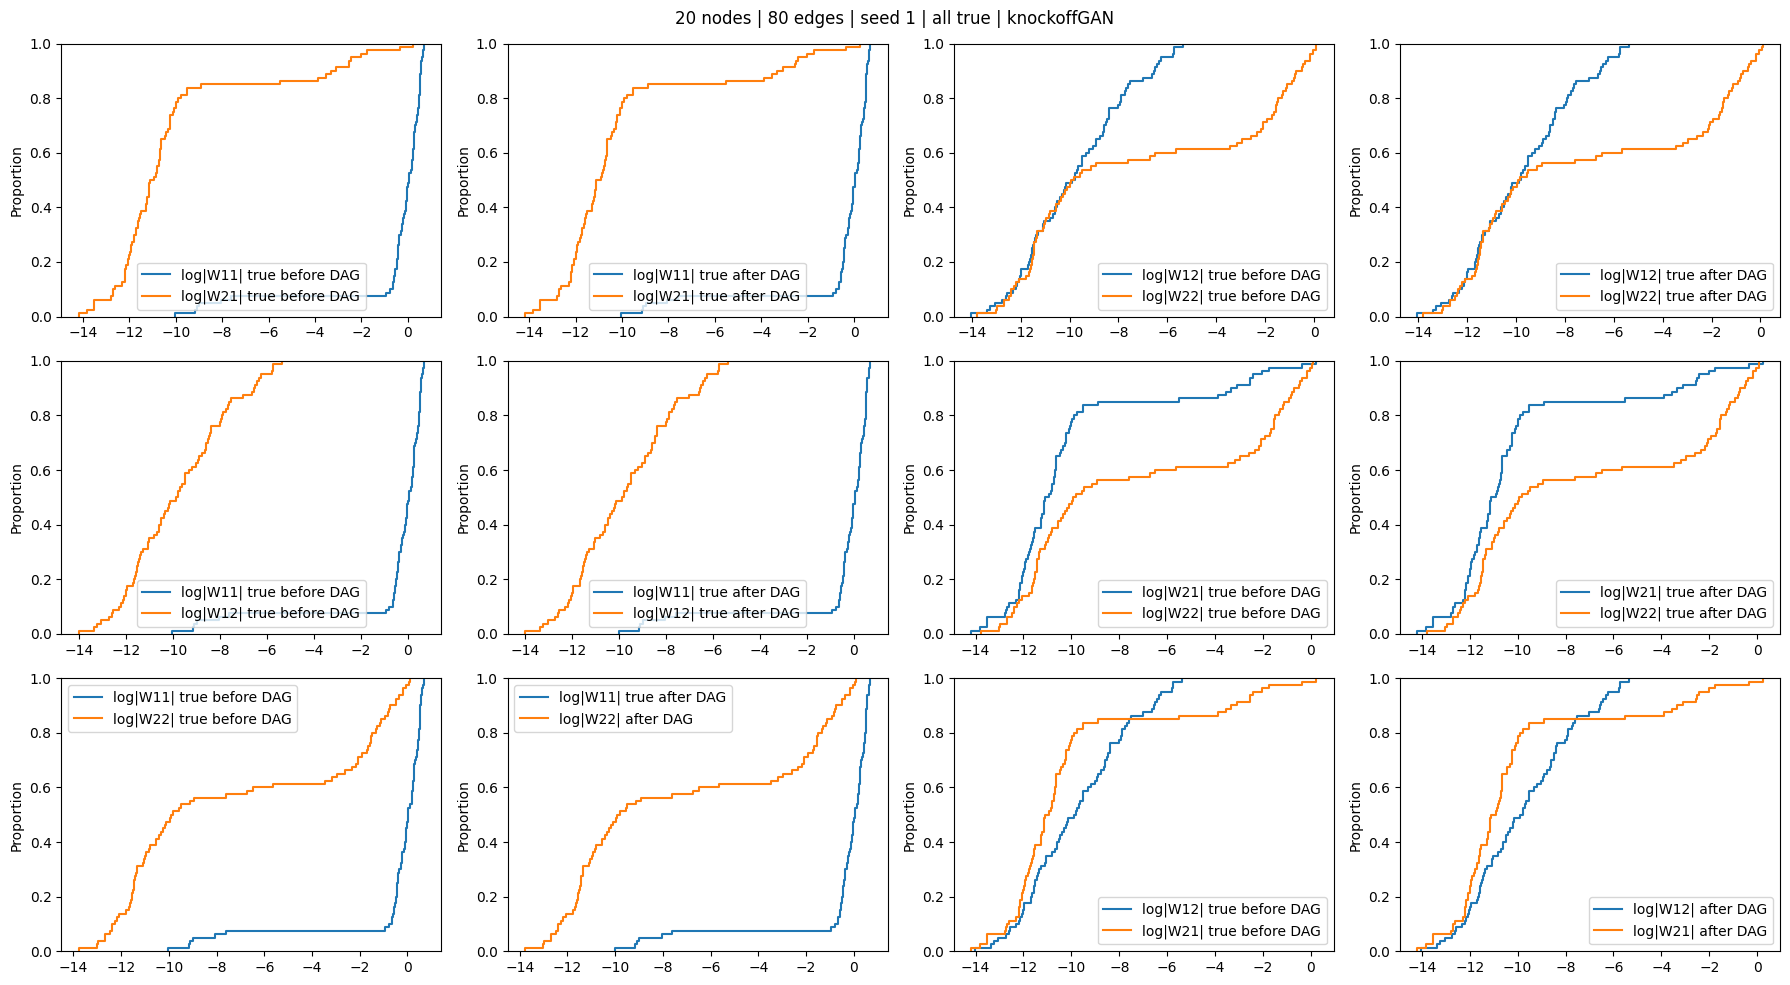

In [111]:
draw_results_3(20, 4, 1, 'v11/v20', None, 'knockoffGAN')
draw_results_3_all(20, 4, 1, 'v11/v20', None, 'knockoffGAN')
draw_results_3_all_null(20, 4, 1, 'v11/v20', None, 'knockoffGAN')
draw_results_3_all_true(20, 4, 1, 'v11/v20', None, 'knockoffGAN')

In [77]:
# thresh = 1e-2
data_list = data_40_list_v34
B_true = data_list[0][0]
n_nodes = 40
for thresh in [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]:
    print(f"====================")
    print(f"t: {thresh}")
    for i in range(1, 11):
        data = get_data(i, 'est', data_list)
        Z_11_21 = get_Z(data, n_nodes=n_nodes)
        Z_12_22 = get_Z(data, n_nodes=n_nodes, left=12, right=22)
        Z_11_12 = get_Z(data, n_nodes=n_nodes, left=11, right=12)
        Z_21_22 = get_Z(data, n_nodes=n_nodes, left=21, right=22)
        Z1 = Z_11_21 - Z_12_22
        Z2 = Z_11_21 - Z_11_12
        Z3 = Z_11_21 - Z_21_22
        print(f"seed {i}: ")
        print(f"Z = Z_11_21 - Z_12_22: ", end="")
        print((Z1[~B_true] > thresh).sum() - (Z1[~B_true] < -thresh).sum(), end=" | ")
        print((Z1[B_true] > thresh).sum() - (Z1[B_true] < -thresh).sum())
        
        print(f"Z = Z_11_21 - Z_11_12: ", end="")
        print((Z2[~B_true] > thresh).sum() - (Z2[~B_true] < -thresh).sum(), end=" | ")
        print((Z2[B_true] > thresh).sum() - (Z2[B_true] < -thresh).sum())

        print(f"Z = Z_11_21 - Z_21_22: ", end="")
        print((Z3[~B_true] > thresh).sum() - (Z3[~B_true] < -thresh).sum(), end=" | ")
        print((Z3[B_true] > thresh).sum() - (Z3[B_true] < -thresh).sum())

t: 1
seed 1: 
Z = Z_11_21 - Z_12_22: 0 | 4
Z = Z_11_21 - Z_11_12: 0 | 40
Z = Z_11_21 - Z_21_22: 0 | 45
seed 2: 
Z = Z_11_21 - Z_12_22: 0 | 5
Z = Z_11_21 - Z_11_12: 0 | 40
Z = Z_11_21 - Z_21_22: 0 | 43
seed 3: 
Z = Z_11_21 - Z_12_22: 0 | 5
Z = Z_11_21 - Z_11_12: 0 | 42
Z = Z_11_21 - Z_21_22: 0 | 45
seed 4: 
Z = Z_11_21 - Z_12_22: 0 | 7
Z = Z_11_21 - Z_11_12: 0 | 41
Z = Z_11_21 - Z_21_22: 0 | 58
seed 5: 
Z = Z_11_21 - Z_12_22: 0 | 5
Z = Z_11_21 - Z_11_12: 0 | 38
Z = Z_11_21 - Z_21_22: 0 | 48
seed 6: 
Z = Z_11_21 - Z_12_22: 0 | 7
Z = Z_11_21 - Z_11_12: 0 | 41
Z = Z_11_21 - Z_21_22: 0 | 48
seed 7: 
Z = Z_11_21 - Z_12_22: 0 | 6
Z = Z_11_21 - Z_11_12: 0 | 46
Z = Z_11_21 - Z_21_22: 0 | 56
seed 8: 
Z = Z_11_21 - Z_12_22: 0 | 8
Z = Z_11_21 - Z_11_12: 0 | 39
Z = Z_11_21 - Z_21_22: 0 | 49
seed 9: 
Z = Z_11_21 - Z_12_22: 0 | 6
Z = Z_11_21 - Z_11_12: 0 | 41
Z = Z_11_21 - Z_21_22: 0 | 47
seed 10: 
Z = Z_11_21 - Z_12_22: -1 | 6
Z = Z_11_21 - Z_11_12: 1 | 41
Z = Z_11_21 - Z_21_22: 0 | 45
t: 0.5
seed 1

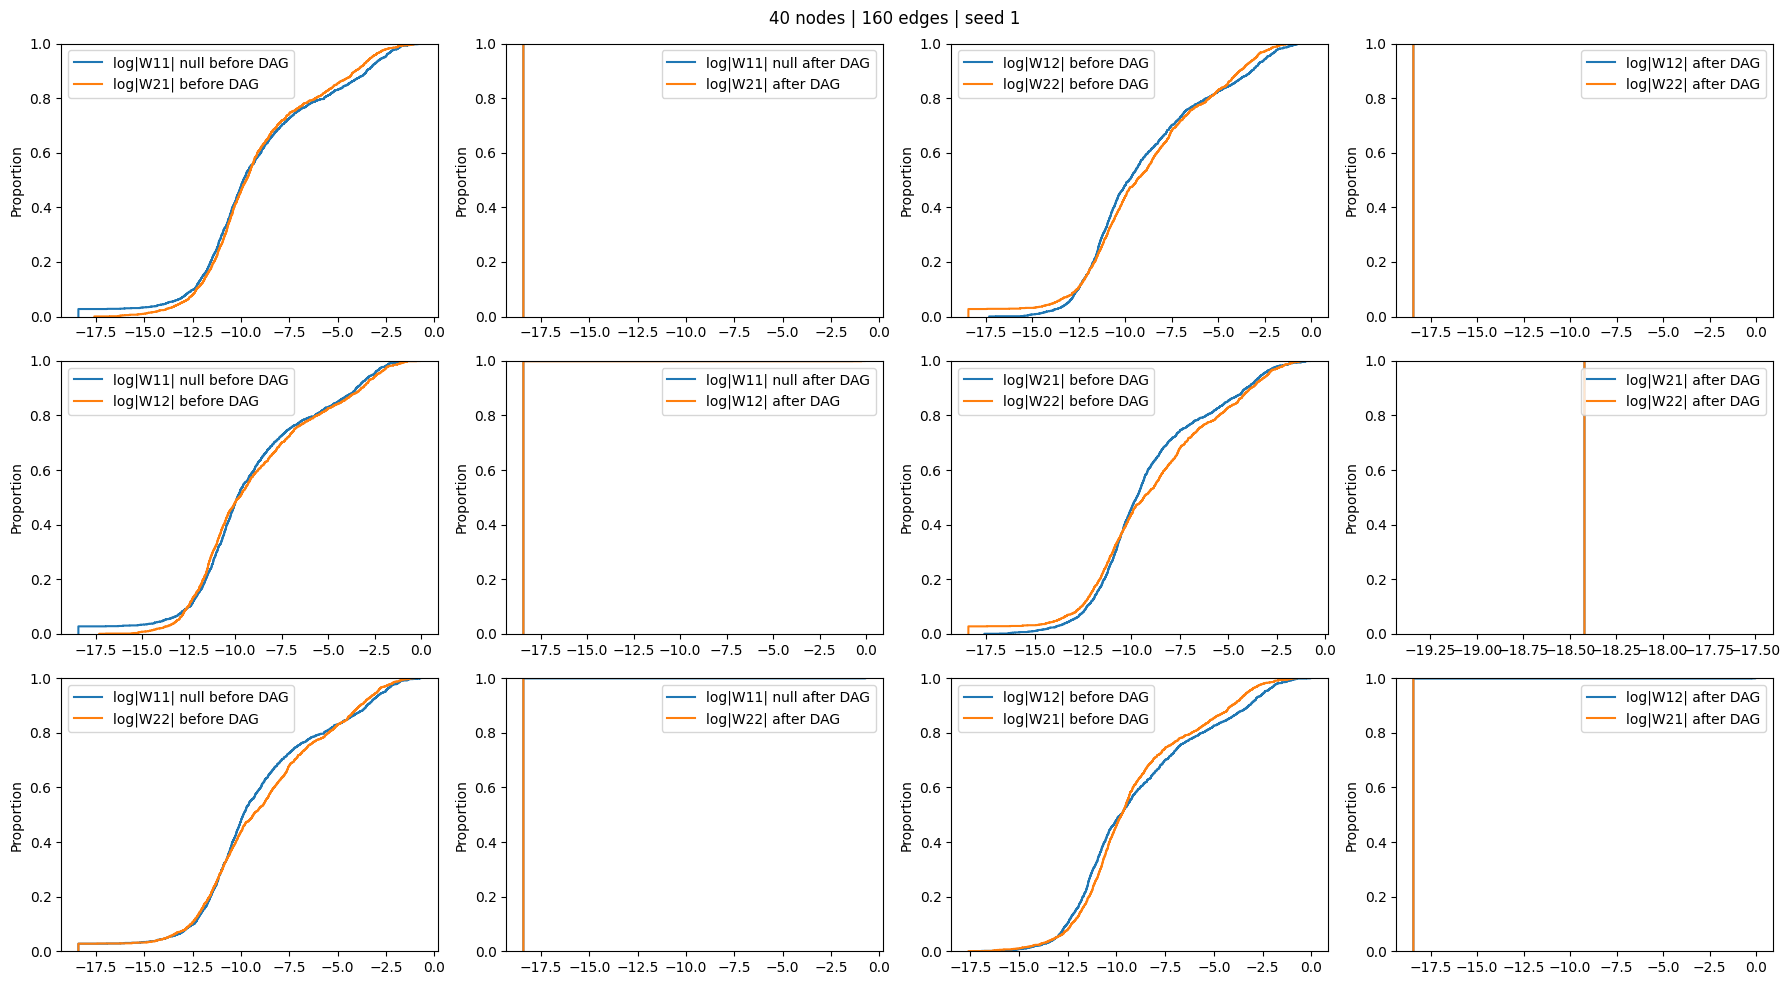

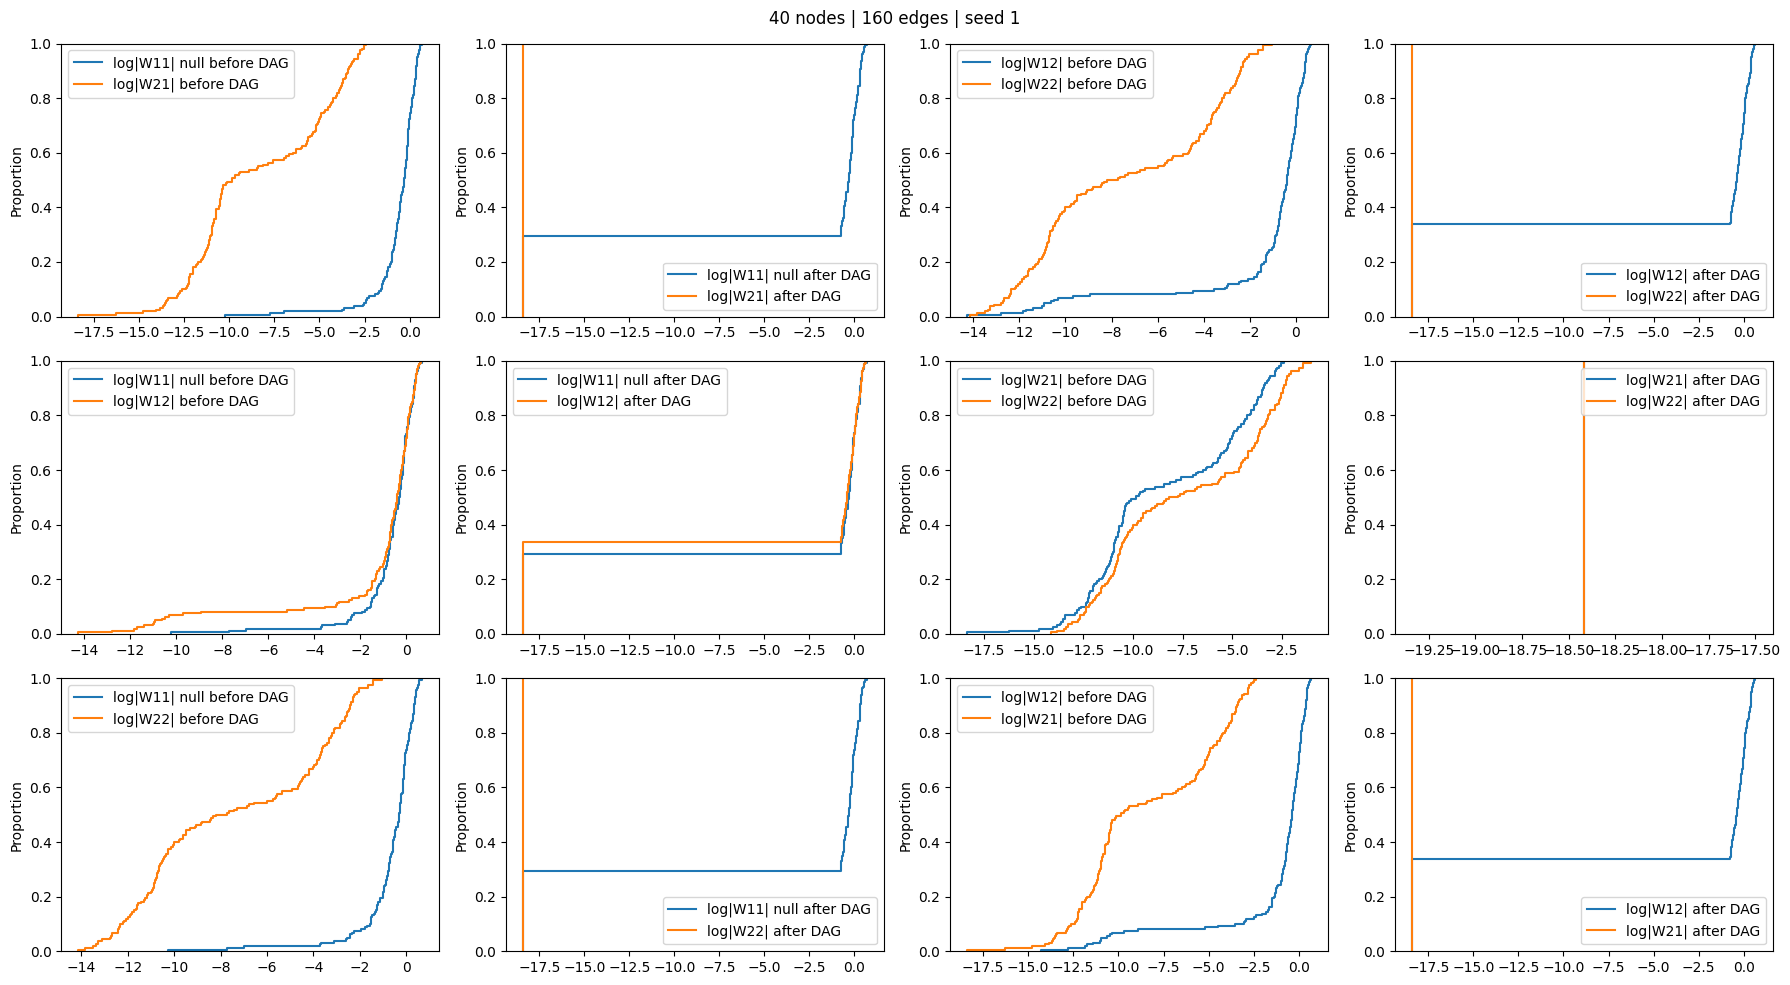

In [60]:
draw_results_3_all_null(40, 4, 1, 'v34/v40', data_40_list_v34)
draw_results_3_all_true(40, 4, 1, 'v34/v40', data_40_list_v34)

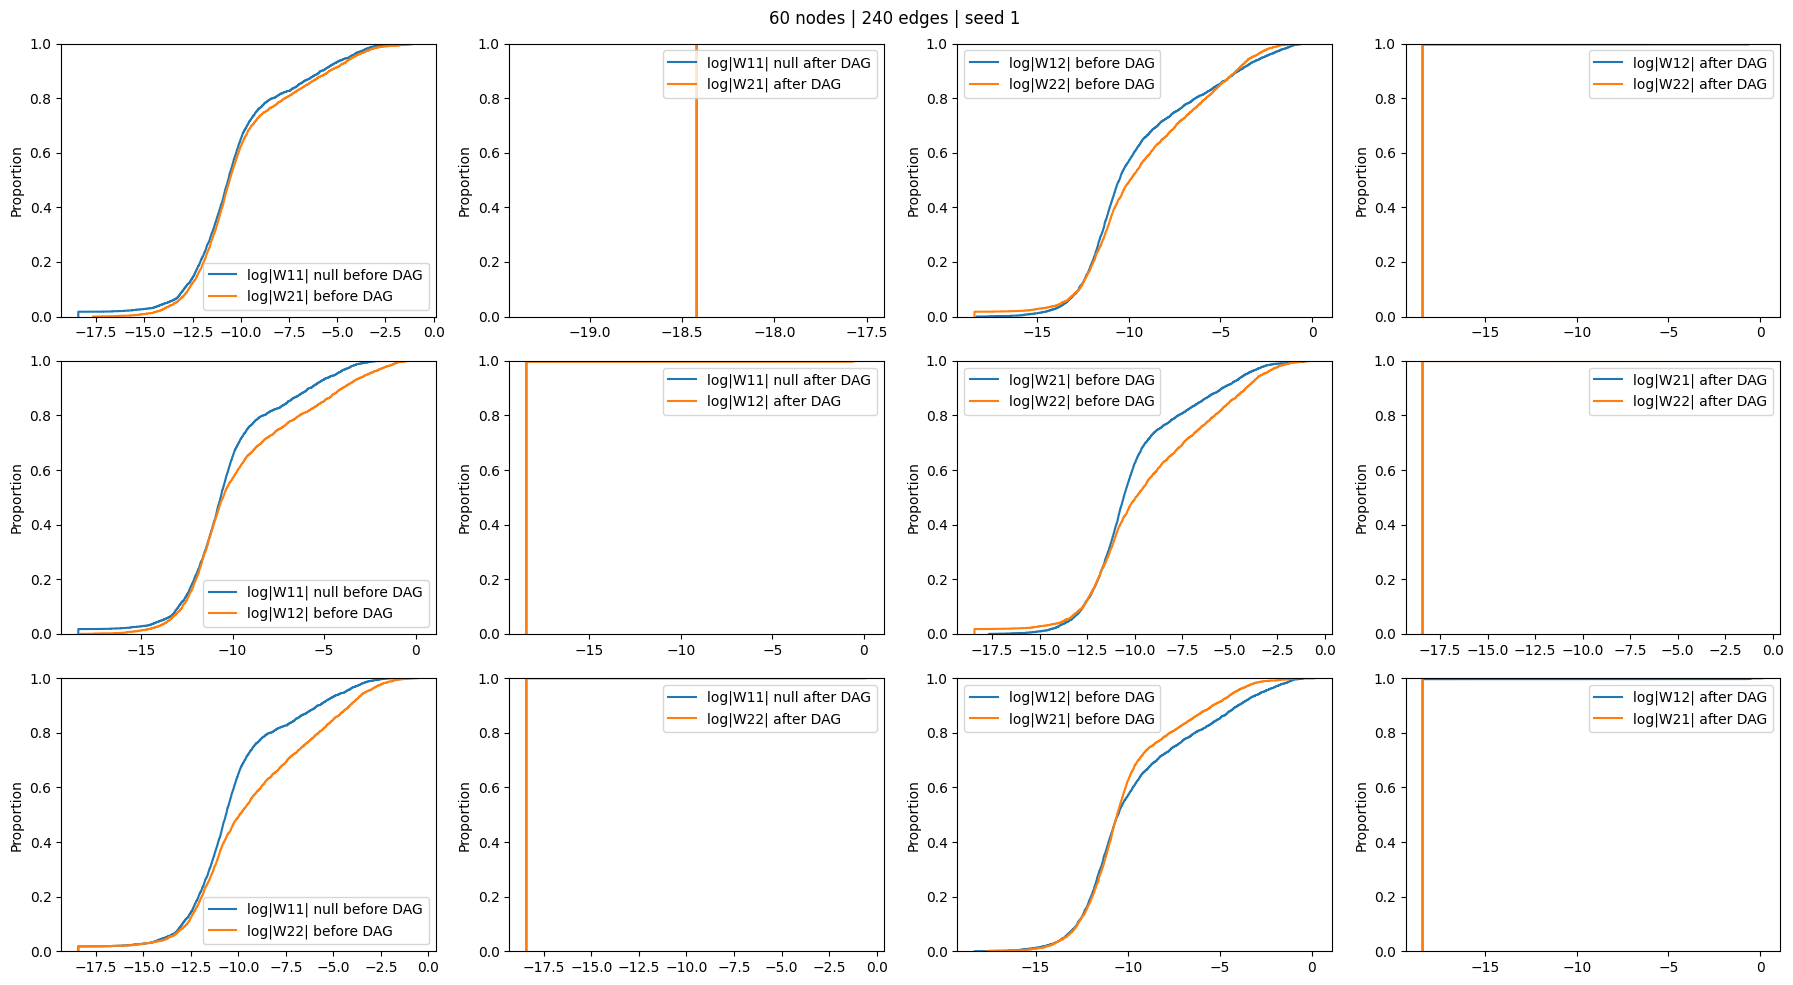

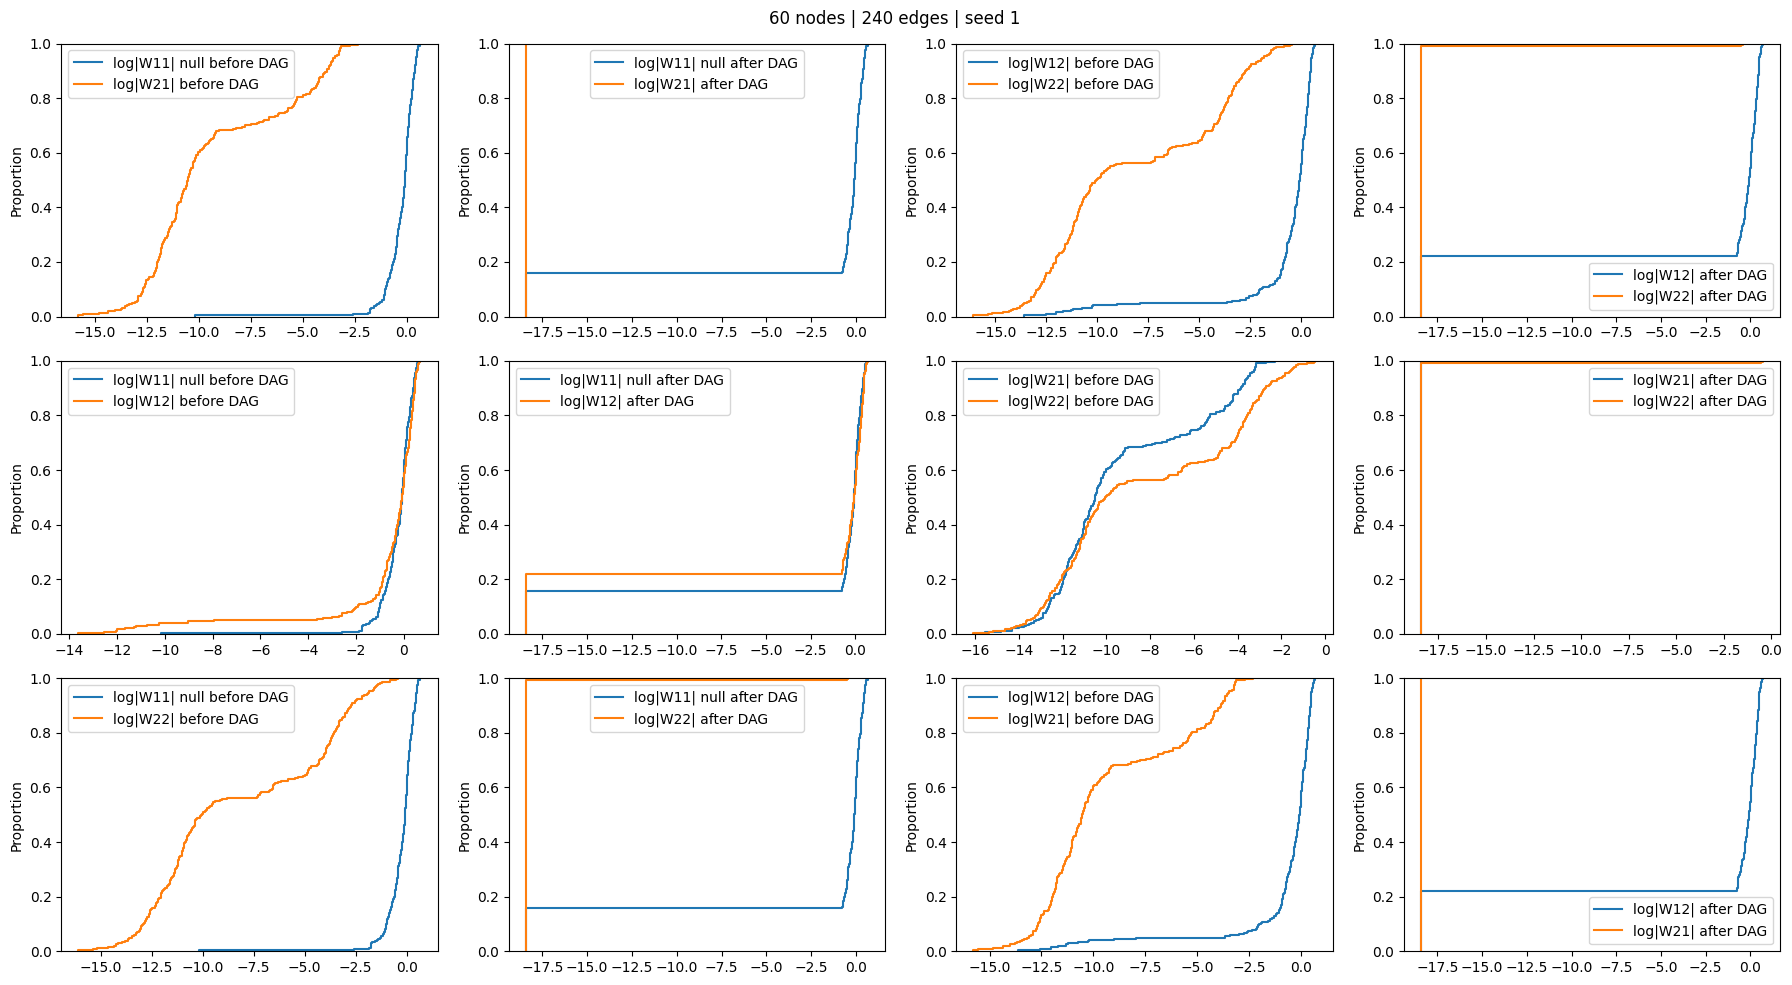

In [61]:
draw_results_3_all_null(60, 4, 1, 'v34/v60', data_60_list_v34)
draw_results_3_all_true(60, 4, 1, 'v34/v60', data_60_list_v34)

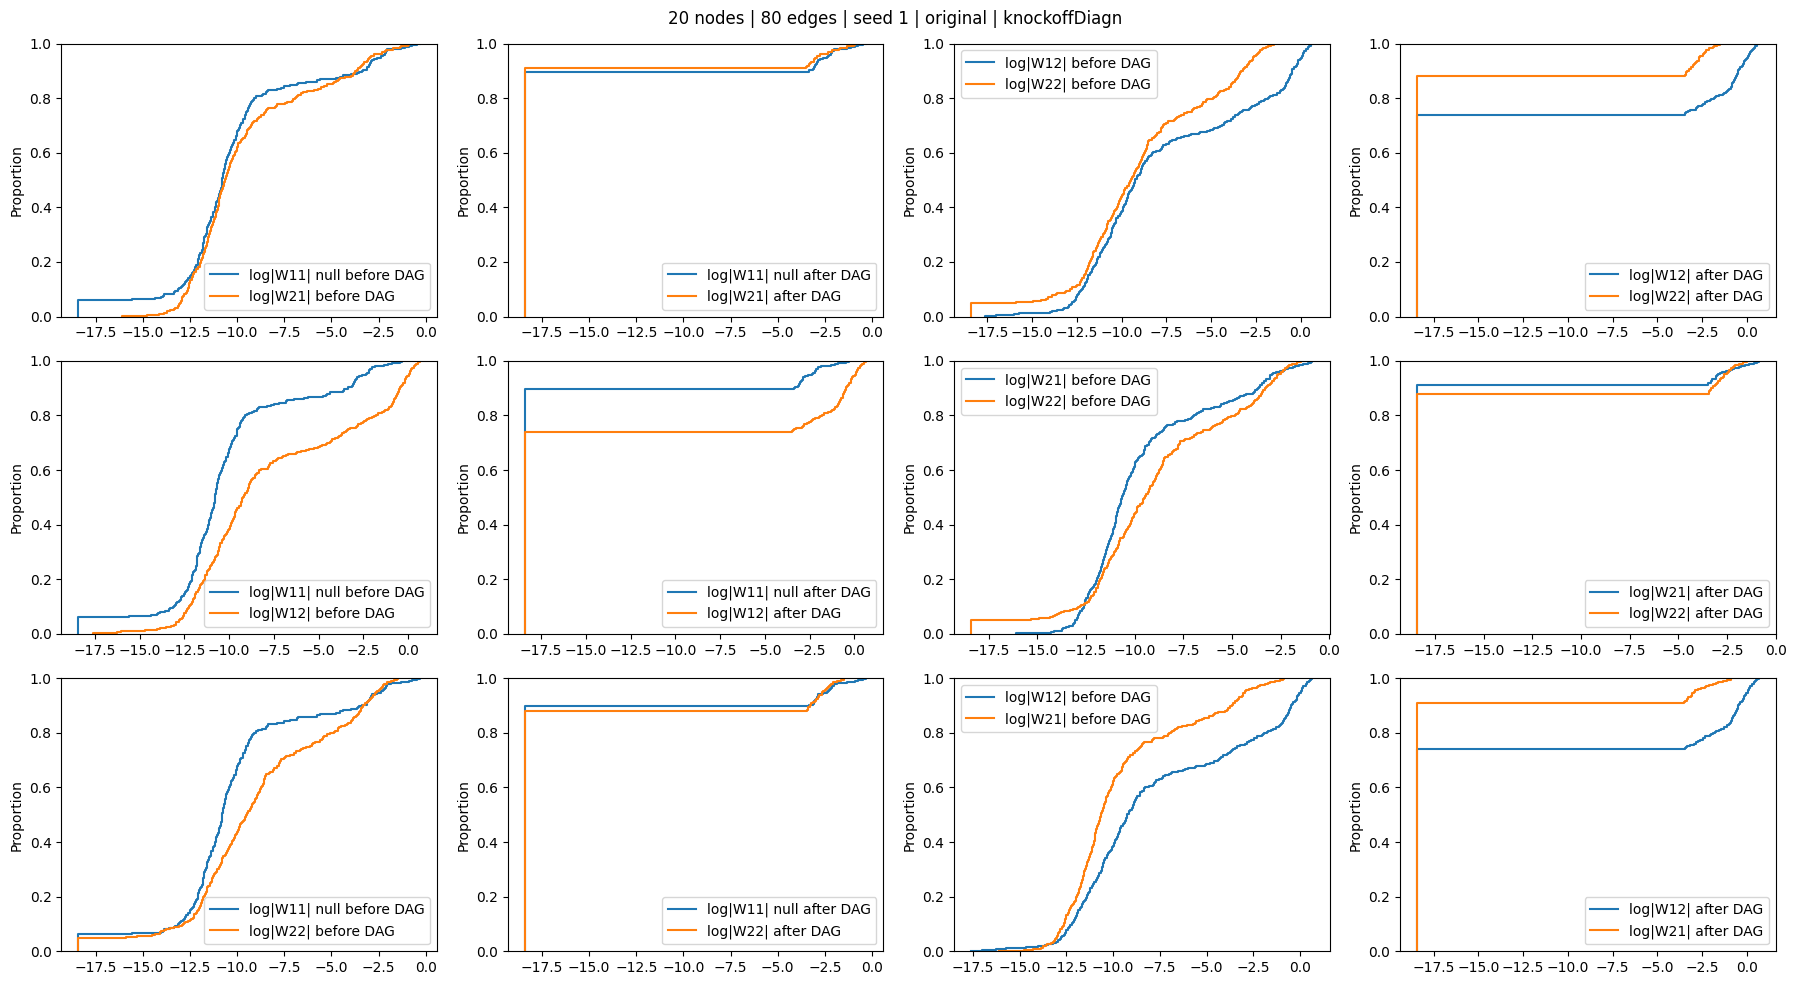

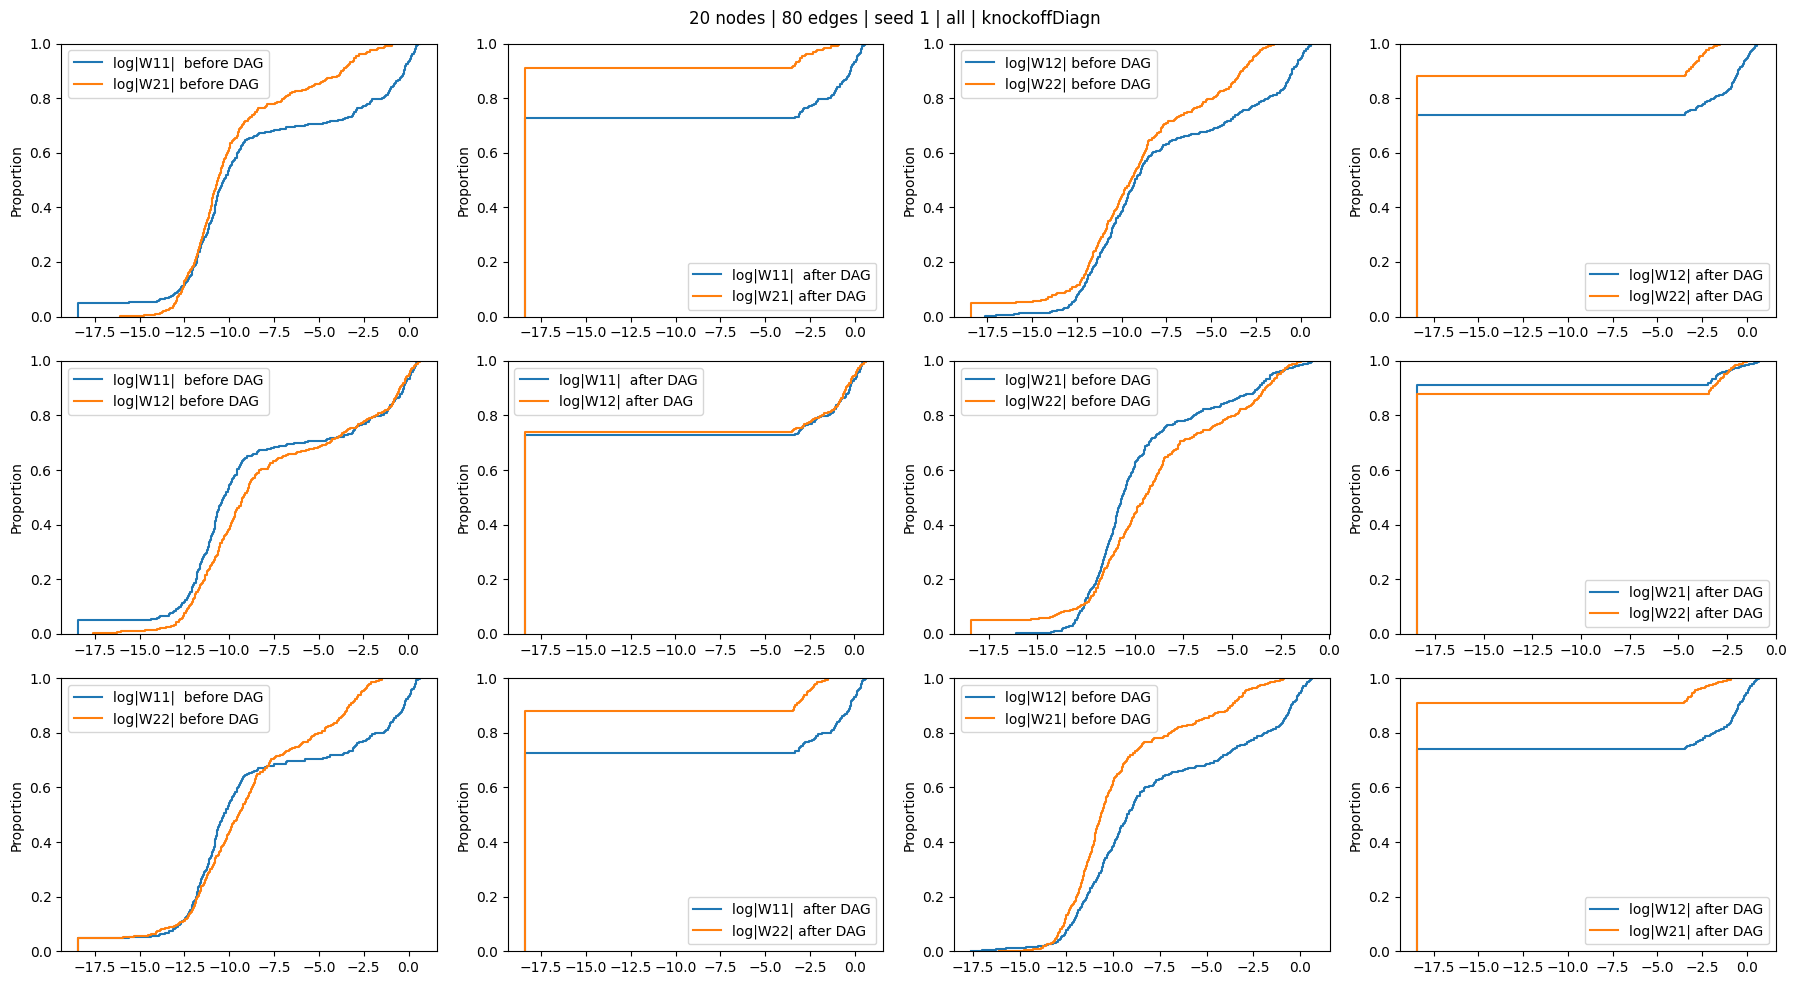

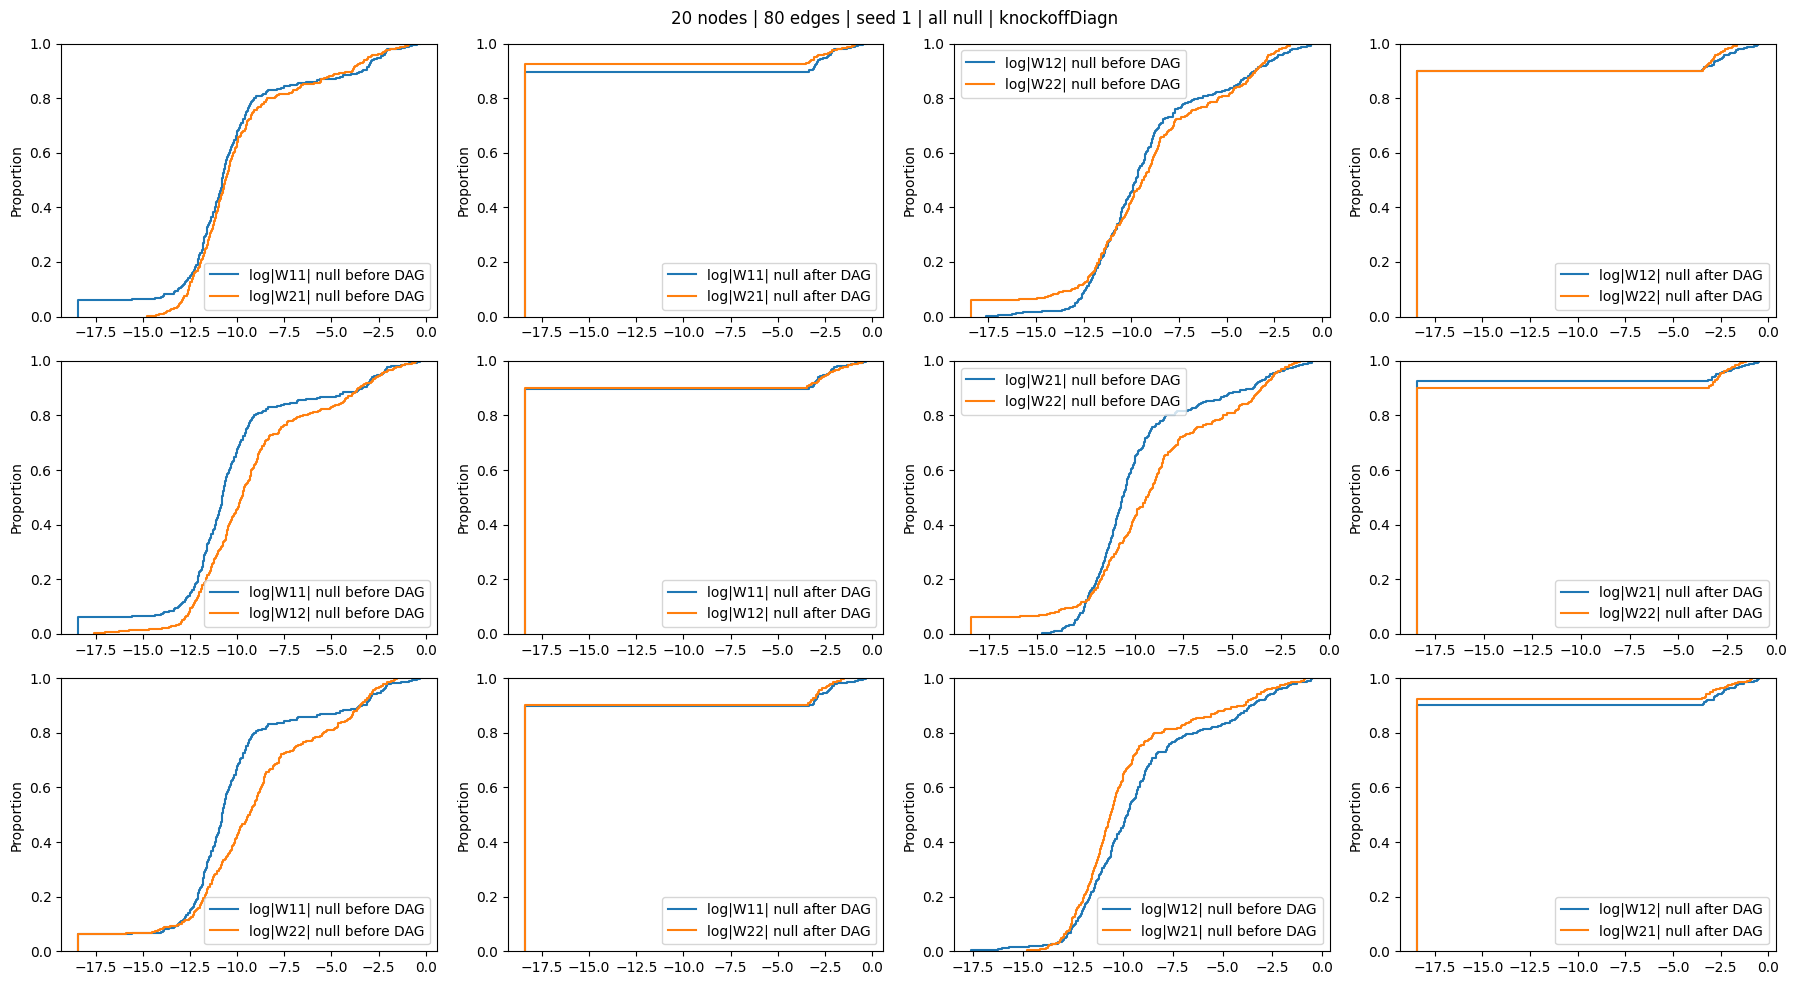

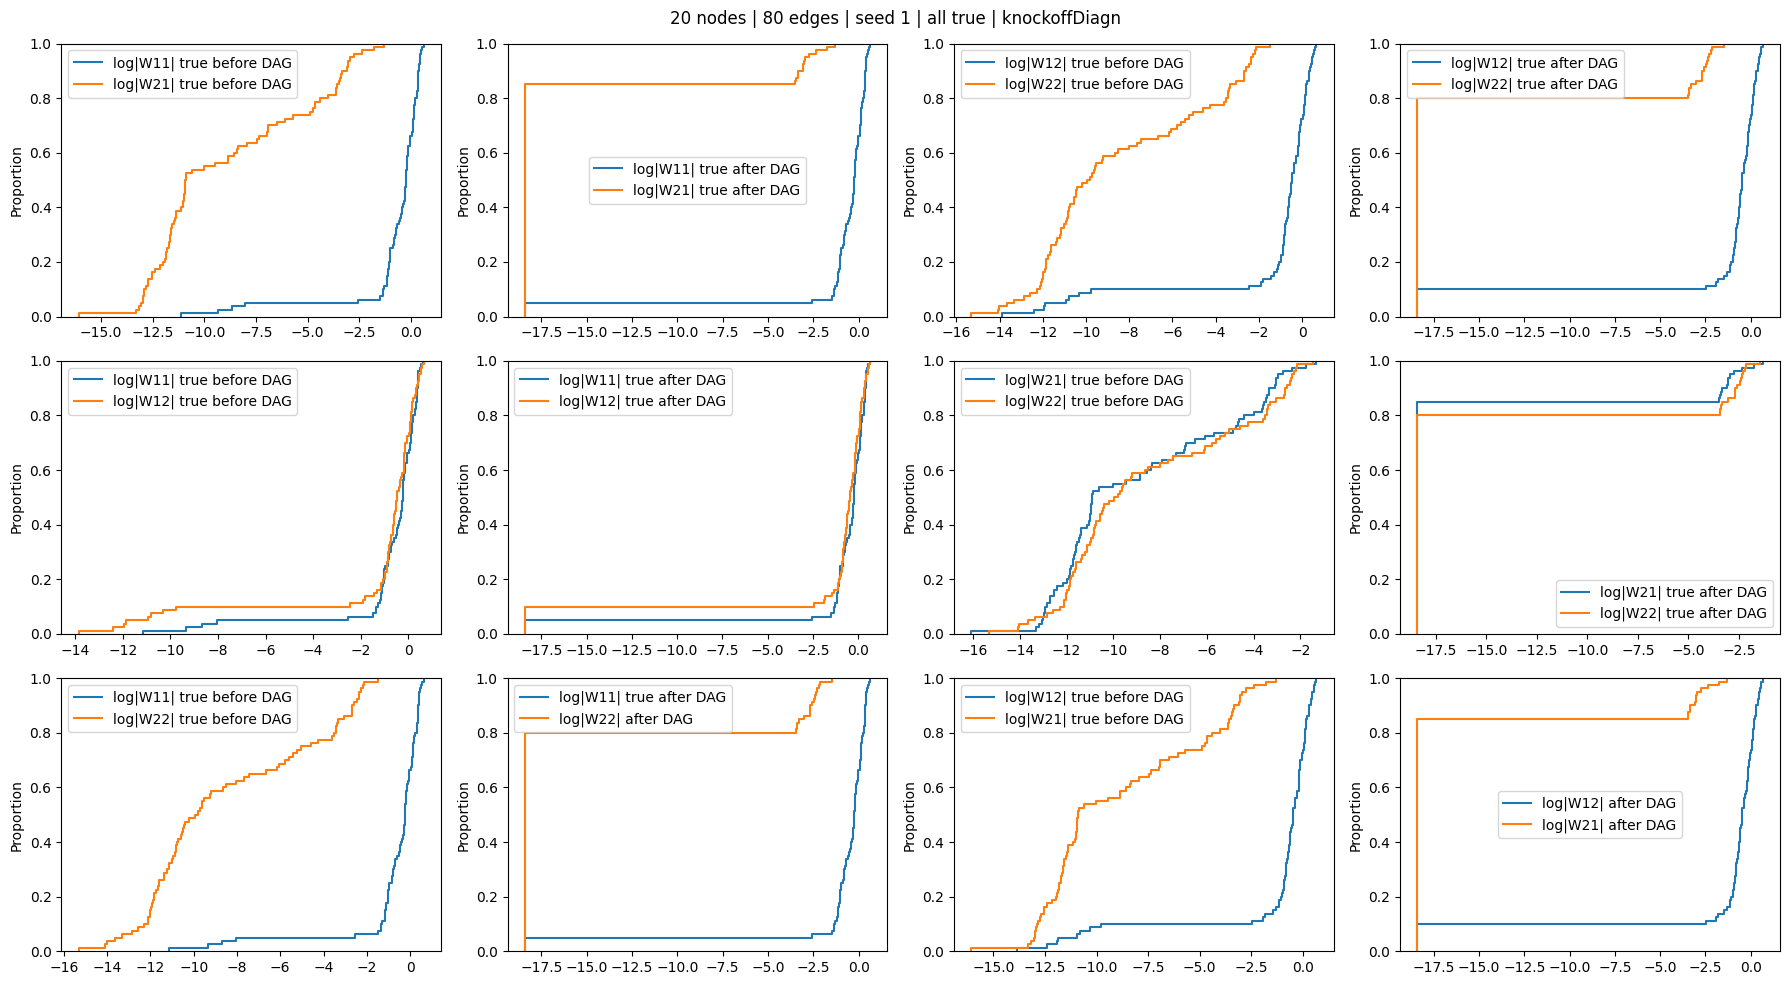

In [113]:
draw_results_3(20, 4, 1, 'v37/v20', None, 'knockoffDiagn')
draw_results_3_all(20, 4, 1, 'v37/v20', None, 'knockoffDiagn')
draw_results_3_all_null(20, 4, 1, 'v37/v20', None, 'knockoffDiagn')
draw_results_3_all_true(20, 4, 1, 'v37/v20', None, 'knockoffDiagn')